In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# FilePath to Stats

In [3]:
mypath = r"BeatManiaStats Others"  # write your own path here
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [4]:
onlyfiles
beat_metrics = [f for f in onlyfiles if "Beat_Metric" in f]
combat_metrics = [f for f in onlyfiles if "Combat_Metric" in f]
various_metrics = [f for f in onlyfiles if "Various_Metric" in f]
print(beat_metrics)

beat_metrics_no_rhythm = [f for f in beat_metrics if "NoRhythm" in f]
beat_metrics_controlled = [f for f in beat_metrics if "Controlled" in f]

['000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv', '000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv', '061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv', '061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv', '088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv', '088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv', '157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv', '157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv', '198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv', '198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv', '244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv', '244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv', '246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv', '246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv', '288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv', '288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv', '353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv', '353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv', '427217_NoRhythm_04_12_21_0

In [5]:
action_filter_jumps = ["Double Jump", "Jump"]
action_filter_attacks= ["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1","Player Attack Weak Attack","Player Attack Dash"]
action_filter_shield = ["Player Shield"]

action_filter_everything = []
action_filter_everything.extend(action_filter_jumps)
action_filter_everything.extend(action_filter_attacks)

# fix writing mistakes in beat metrics (if you haven't already)

In [41]:

#fix Beat_metric files
already_fixed = 0
NaN_removed = 0
old_version_fixed = 0

def beat_delta_fix(text):
    if "." in text:
        text = text.split(".")[0]
        #print("beat_delta_fix")
    return text

#o = [beat_metrics[7]]
for file in beat_metrics:
    path = os.path.join(mypath, file)
    #print(file)
    if "Beat_Metric" in path:
        try:
            df = pd.read_csv(path,sep=',', skiprows = 2, header = None, dtype = str)
        except:
            df = pd.read_csv(path,sep=',', skiprows = 3, header = None, dtype = str) # remove instances where first data row contains NaN
            NaN_removed += 1
        if len(df.columns) == 10:
            df.columns = ["Version", "Time", "Beathit", "BeatDelta", "BeatDelta2", "BeatLength", "BeatLength2", "ToleranceRange", "ToleranceRange2", "Action"]
            df["BeatDelta2"] = df["BeatDelta2"].astype(str).apply(beat_delta_fix)
            df["BeatDelta"] = df["BeatDelta"].astype(str) + '.' + df.pop("BeatDelta2").astype(str)
            df["BeatLength"] = df["BeatLength"].astype(str) + '.' + df.pop("BeatLength2").astype(str)
            df["ToleranceRange"] = df["ToleranceRange"].astype(str) + '.' + df.pop("ToleranceRange2").astype(str)
            f = open(path,"w")
            f.write("sep=,\n")
            df.to_csv(f, index = False,line_terminator='\n',sep=',')
            f.close()
            old_version_fixed += 1
        else:
            already_fixed += 1

print("NaN removed", NaN_removed)
print("old version fixed", old_version_fixed)
print("already fixed", already_fixed)

NaN removed 10
old version fixed 38
already fixed 4


# BeatMetric Analysis

In [6]:
# beat_metric analysis
path = os.path.join(mypath, beat_metrics[0])
df = pd.read_csv(path,sep=',', skiprows = 1)
print(path)
df

BeatManiaStats Others\000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv


Version  Time  Beathit  BeatDelta  BeatLength  ToleranceRange  \
0    NoRhythm     1    False   0.189819         0.5        0.141453   
1    NoRhythm     1     True   0.023926         0.5        0.141453   
2    NoRhythm     2     True   0.072876         0.5        0.141453   
3    NoRhythm     3    False   0.222656         0.5        0.141453   
4    NoRhythm     4     True   0.139282         0.5        0.141453   
..        ...   ...      ...        ...         ...             ...   
711  NoRhythm  1202    False   0.180564         0.6        0.141453   
712  NoRhythm  1204    False   0.396921         0.6        0.141453   
713  NoRhythm  1204    False   0.230271         0.6        0.141453   
714  NoRhythm  1207    False   0.197068         0.6        0.141453   
715  NoRhythm  1210    False   0.196970         0.6        0.141453   

                           Action  
0                            Jump  
1                     Double Jump  
2    Player Attack StrongAttack 1  
3                            Jump  
4                     Double Jump  
..                            ...  
711                          Jump  
712                          Jump  
713                   Double Jump  
714                 Player Shield  
715                 Player Shield  

[716 rows x 7 columns]

# Percentage of Hit/Miss between versions and different actions

In [7]:
def percentage(filter):
    ar = []
    for f in beat_metrics_no_rhythm:
        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]
        
        hit = np.count_nonzero(df_beat["Beathit"])
        cnt = len(df_beat["Beathit"])
        if cnt != 0:
            ar.append(round(hit/cnt,2))

    ar = np.array(ar)
    print("Beat beat hits No Rhythm",np.average(ar))



    ar = []
    for f in beat_metrics_controlled:
        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]

        hit = np.count_nonzero(df_beat["Beathit"])
        cnt = len(df_beat["Beathit"])
        if cnt != 0:
            ar.append(round(hit/cnt,2))

    ar = np.array(ar)
    print("Beat beat hits Rhythm Controlled",np.average(ar))
    # beat hits in No Rhythm vs in Rhythm Controlled. 
    # in Rhythm controlled people hit on the rhythm more. 

In [8]:
print("everything (without shield)")
percentage(action_filter_everything)
print("jumps")
percentage(action_filter_jumps)
print("attacks")
percentage(action_filter_attacks)
print("shield")
percentage(action_filter_shield)

everything (without shield)
Beat beat hits No Rhythm 0.4
Beat beat hits Rhythm Controlled 0.5342857142857143
jumps
Beat beat hits No Rhythm 0.40095238095238095
Beat beat hits Rhythm Controlled 0.5333333333333333
attacks
Beat beat hits No Rhythm 0.39714285714285713
Beat beat hits Rhythm Controlled 0.520952380952381
shield
Beat beat hits No Rhythm 0.37684210526315787
Beat beat hits Rhythm Controlled 0.3999999999999999


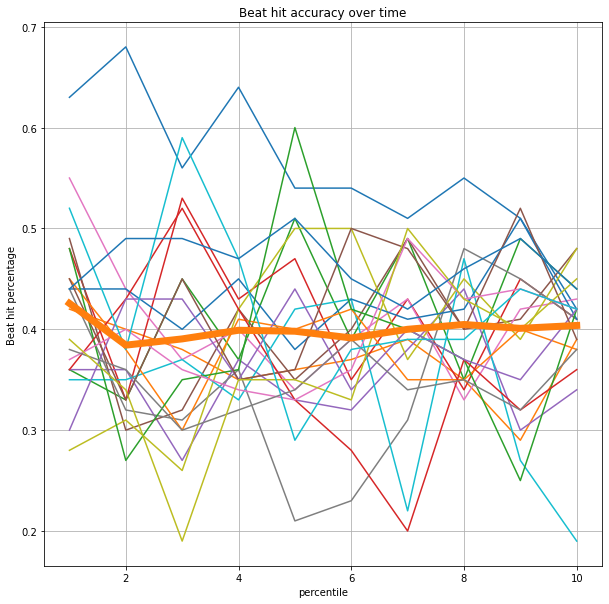

In [9]:
# Beat hits Percentile 
# comparison no rhythm and rhythm controlled. Do they get better? 

def percentage_percentile(beat_files, filter, divisions = 10):

    fig, ax=plt.subplots(figsize=(10,10))

    divisions = 10
    all_avg = []
    for f in beat_files:

        df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
        df_beat = df_beat[df_beat["Action"].isin(filter)]

        time = np.array(df_beat["Time"])
        hits = np.array(df_beat["Beathit"])
        percentile = time.max()/divisions
        #print(percentile)
        avg = []
        #print(time.max())
        for i in range(divisions):
            #print(i, "low",i* percentile,"high", (i+1)* percentile)
            time_filter_low = (i* percentile) < time
            time_filter_high = time < ((i+1)* percentile)
            time_filter = np.logical_and(time_filter_low, time_filter_high)
            #print(list(zip(time_filter,time)))
            this_percentile = hits[time_filter]
            #print(len(this_percentile))
            if len(this_percentile) == 0:
                avg.append(0)
            else:
                avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
        #print(avg)
        ax.plot(np.arange(1,divisions+1),avg)
        all_avg.append(avg)

    all_avg = np.array(all_avg)
    #print(all_avg)
    np.mean(all_avg, axis = 0)
    ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)    

    ax.set_title("Beat hit accuracy over time")
    ax.set_ylabel("Beat hit percentage")
    ax.set_xlabel("percentile")
    ax.grid(True)
    plt.show()    
percentage_percentile(beat_metrics_no_rhythm, action_filter_everything)
# no rhythm and every action

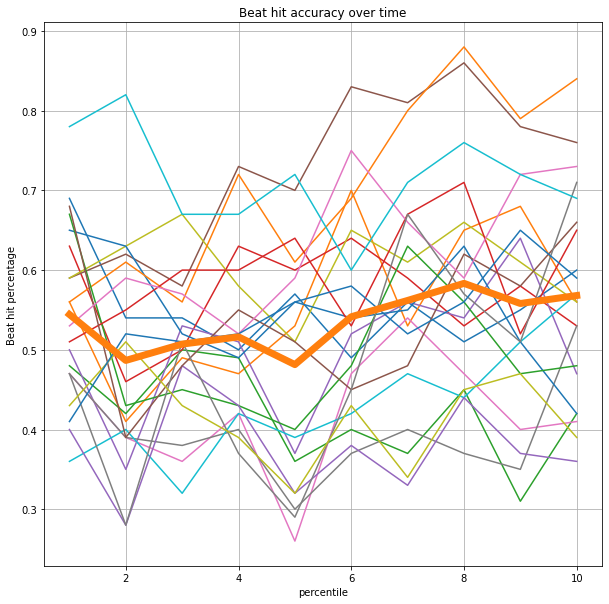

In [10]:
percentage_percentile(beat_metrics_controlled,action_filter_everything)
#beat controlled everything

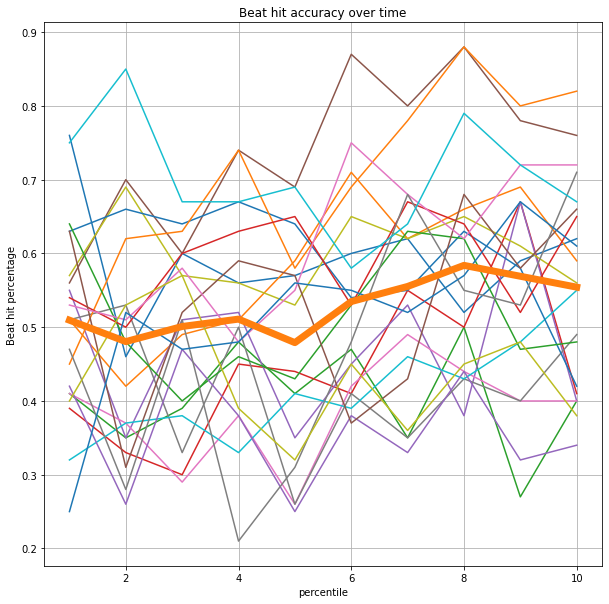

In [11]:
percentage_percentile(beat_metrics_controlled,action_filter_jumps)
# beat controlled only jumps

# scatter plots beatdelta and time

BeatMetric Things

missedBySeconds is beatdelta

b = missedBySeconds <= (ToleranceRange + toleranceShift) || missedBySeconds >= beatLength - (ToleranceRange - toleranceShift)

Attacks that you cannot miss:
["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1"]

Attack that you allways miss: 
["Player Attack Weak Attack"]

Attack you can both fail and hit:
["Player Attack Dash"]

Jumps
["Jump", "Double Jump"]
You can hit/fail both jump types

Independant of Beat:
["Player Shielded"]


000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv 000990_NoRhythm_04_12_21_12_39_Various_Metric.csv 000990_NoRhythm_04_12_21_12_39_Combat_Metric.csv
Jumps hits: 349/633 = 0.55 %
Attacks hits: 41/64 = 0.64 %


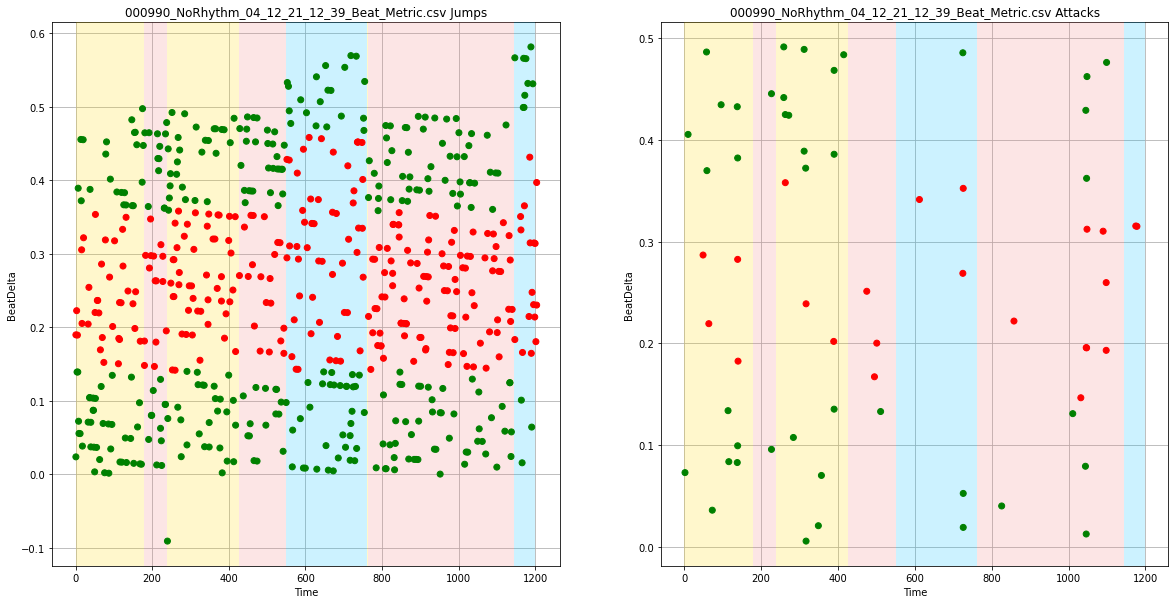

In [21]:
# beat-deltas colored. green is hit and red is no hit
#print(df_beat)

song_color = {"SongChange 0": 'gold', "SongChange 1": 'deepskyblue', "SongChange 2": 'lightcoral'}
# percantage of hits for rhythm controlled and No Rhythm
def hit_percentage(label,df_beat):
    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    print(f"{label} hits: {hit}/{cnt} = {round(hit/cnt,2)} %")
    

def Analyse(beat: str = None, various: str = None, combat: str = None):
    if not isinstance(beat, str):
        raise TypeError("The beat wasn't passed as a String")
    print(beat, various, combat)
    
    df_various = pd.read_csv(os.path.join(mypath, various), sep=',', skiprows = 1)
    df_input_device = df_various[df_various["Action"].isin(["Keyboard & Mouse", "Gamepad"])]
    
    #df_songchange = df_various[df_various["Action"].isin(["Songchange"])]
    df_songchange = df_various.loc[df_various["Action"].str.contains("Songchange", case = False)]
    
    fig, ax=plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,10))
    df_beat = pd.read_csv(os.path.join(mypath, beat), sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(action_filter_jumps)]
    colors = np.where(df_beat["Beathit"], "green", "red")
    songchange = list(df_songchange["Action"])
    songchange_time= list(df_songchange["Time"])
    
    for index in range(len(songchange)):
        if index == len(songchange)-1:
            ax[0].axvspan(songchange_time[index], 1200, facecolor=song_color[songchange[index]], alpha=0.2, zorder=3)
        else: 
            ax[0].axvspan(songchange_time[index], songchange_time[index+1], facecolor=song_color[songchange[index]], alpha=0.2, zorder=3)
    ax[0].scatter(df_beat["Time"],df_beat["BeatDelta"], color=colors, zorder=4)
    ax[0].set_title(f"{beat} Jumps")
    ax[0].set_ylabel("BeatDelta")
    ax[0].set_xlabel("Time")
    ax[0].grid(True)
    hit_percentage("Jumps", df_beat)
    

    df_beat = pd.read_csv(os.path.join(mypath, beat), sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(action_filter_attacks)]
    hit_percentage("Attacks", df_beat)
    colors = np.where(df_beat["Beathit"], "green", "red")
    for index in range(len(songchange)):
        if index == len(songchange)-1:
            ax[1].axvspan(songchange_time[index], 1200, facecolor=song_color[songchange[index]], alpha=0.2, zorder=3)
        else: 
            ax[1].axvspan(songchange_time[index], songchange_time[index+1], facecolor = song_color[songchange[index]], alpha=0.2, zorder=3)
    ax[1].scatter(df_beat["Time"],df_beat["BeatDelta"], color=colors, zorder=4)
    ax[1].set_title(beat+" Attacks")
    ax[1].set_ylabel("BeatDelta")
    ax[1].set_xlabel("Time")
    ax[1].grid(True)

    plt.show()
    

Analyse(beat_metrics[0], various_metrics[0], combat_metrics[0])    

000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv 000990_NoRhythm_04_12_21_12_39_Various_Metric.csv 000990_NoRhythm_04_12_21_12_39_Combat_Metric.csv
Jumps hits: 349/633 = 0.55 %
Attacks hits: 41/64 = 0.64 %


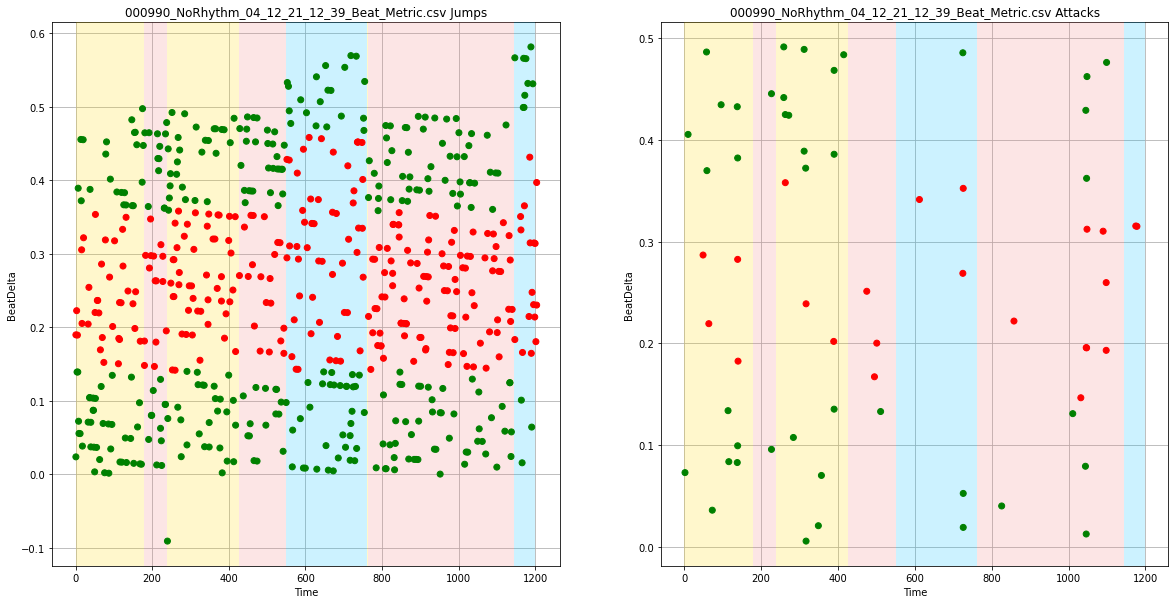

000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Various_Metric.csv 000990_RhythmControlled_04_12_21_12_11_Combat_Metric.csv
Jumps hits: 300/510 = 0.59 %
Attacks hits: 144/300 = 0.48 %


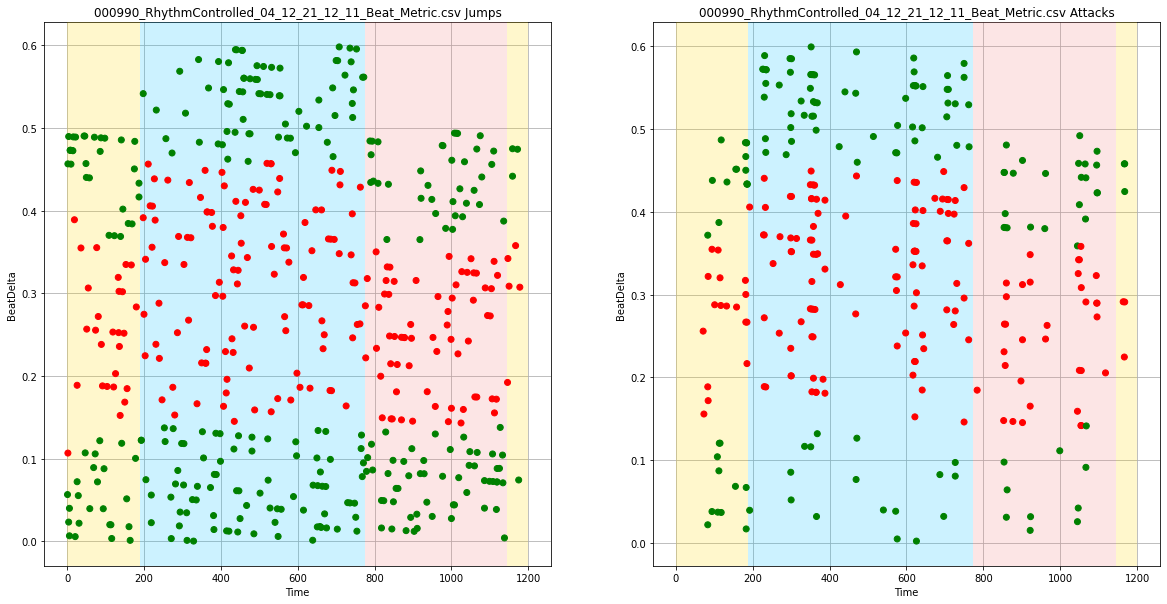

061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv 061295_NoRhythm_05_12_21_05_27_Various_Metric.csv 061295_NoRhythm_05_12_21_05_27_Combat_Metric.csv
Jumps hits: 257/700 = 0.37 %
Attacks hits: 70/178 = 0.39 %


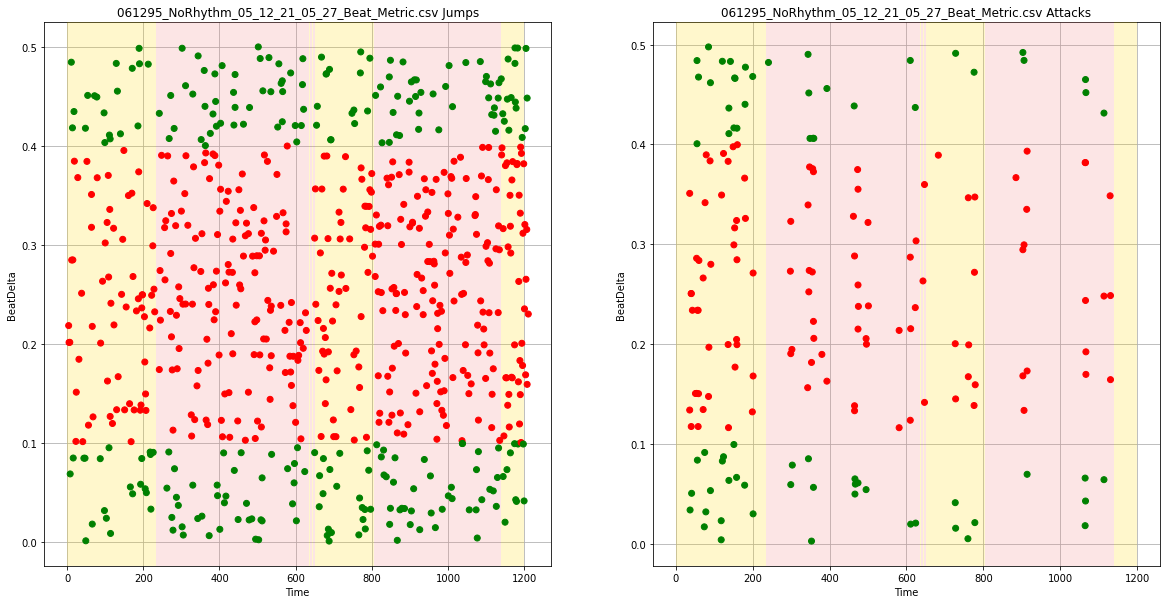

061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Various_Metric.csv 061295_RhythmControlled_05_12_21_05_53_Combat_Metric.csv
Jumps hits: 382/655 = 0.58 %
Attacks hits: 72/168 = 0.43 %


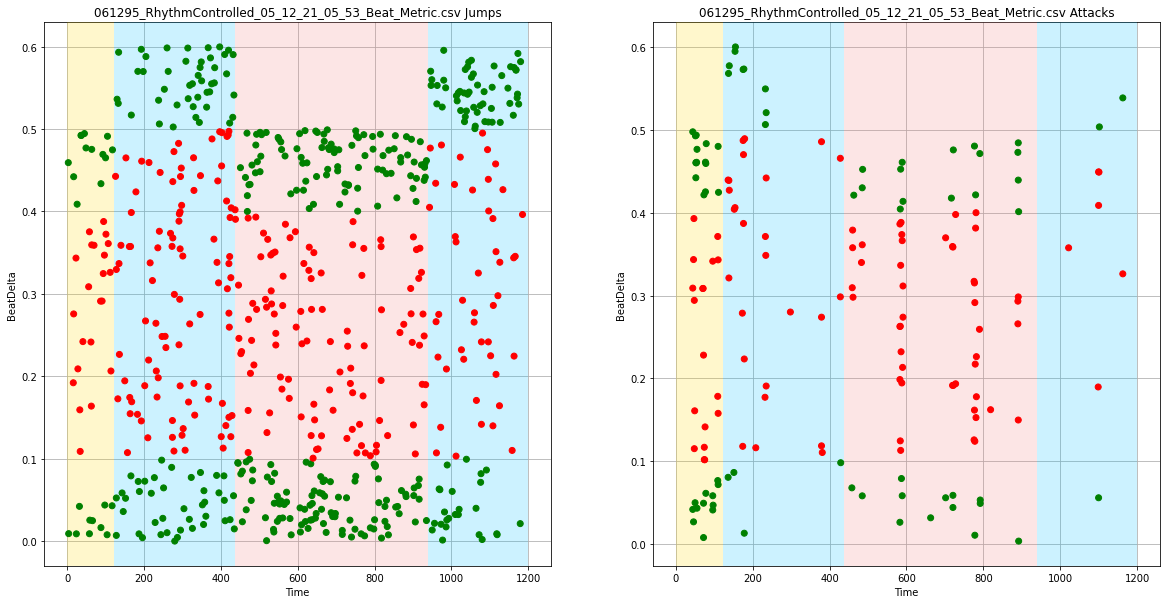

088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv 088835_NoRhythm_21_11_21_05_42_Various_Metric.csv 088835_NoRhythm_21_11_21_05_42_Combat_Metric.csv
Jumps hits: 246/591 = 0.42 %
Attacks hits: 27/68 = 0.4 %


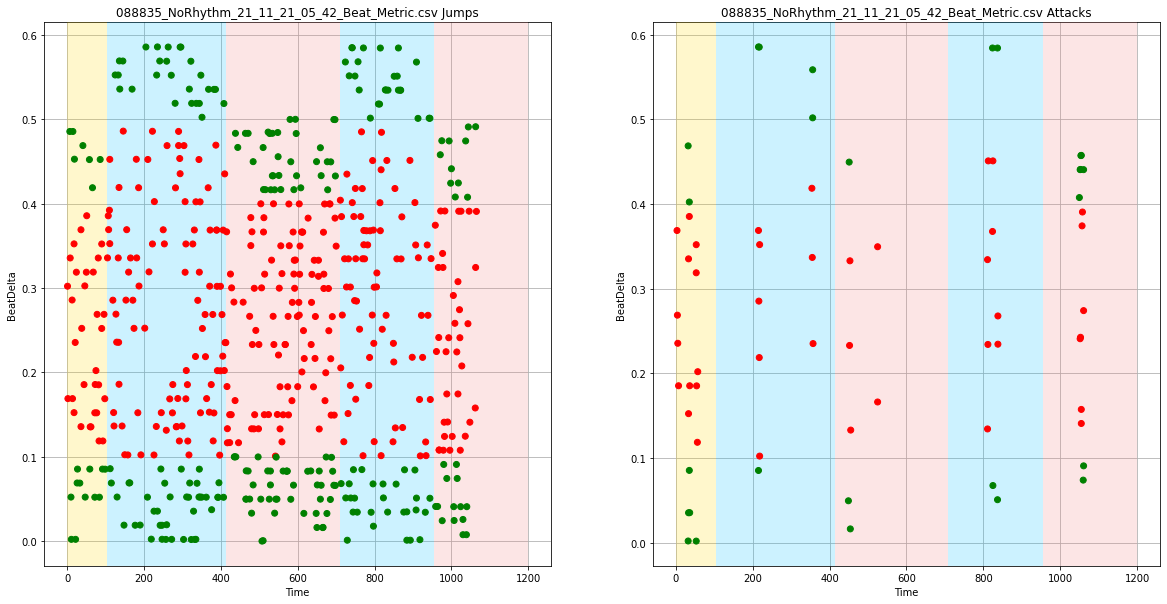

088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Various_Metric.csv 088835_RhythmControlled_21_11_21_05_13_Combat_Metric.csv
Jumps hits: 177/437 = 0.41 %
Attacks hits: 165/378 = 0.44 %


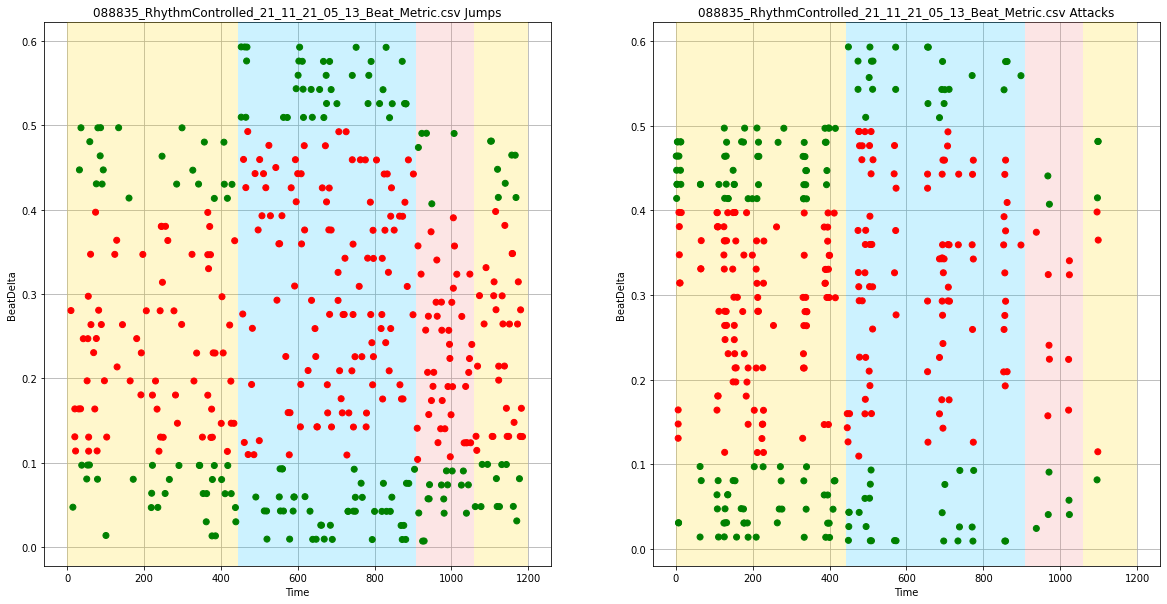

157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv 157771_NoRhythm_02_12_21_06_04_Various_Metric.csv 157771_NoRhythm_02_12_21_06_04_Combat_Metric.csv
Jumps hits: 181/446 = 0.41 %
Attacks hits: 176/405 = 0.43 %


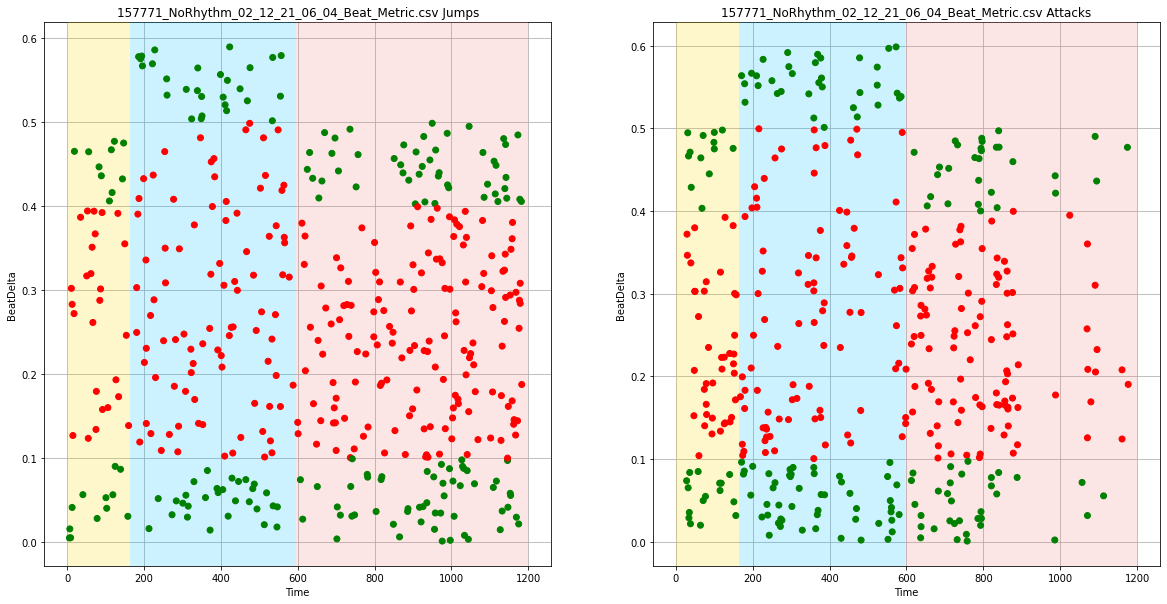

157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Various_Metric.csv 157771_RhythmControlled_02_12_21_06_35_Combat_Metric.csv
Jumps hits: 124/264 = 0.47 %
Attacks hits: 232/367 = 0.63 %


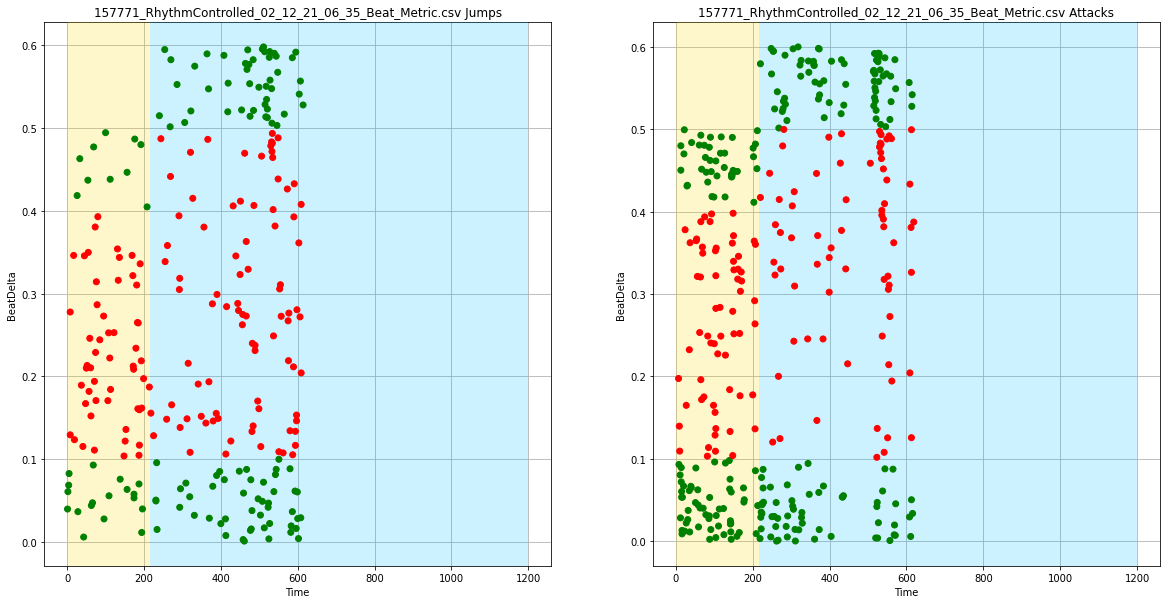

198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv 198760_NoRhythm_06_12_21_06_35_Various_Metric.csv 198760_NoRhythm_06_12_21_06_35_Combat_Metric.csv
Jumps hits: 171/498 = 0.34 %
Attacks hits: 116/324 = 0.36 %


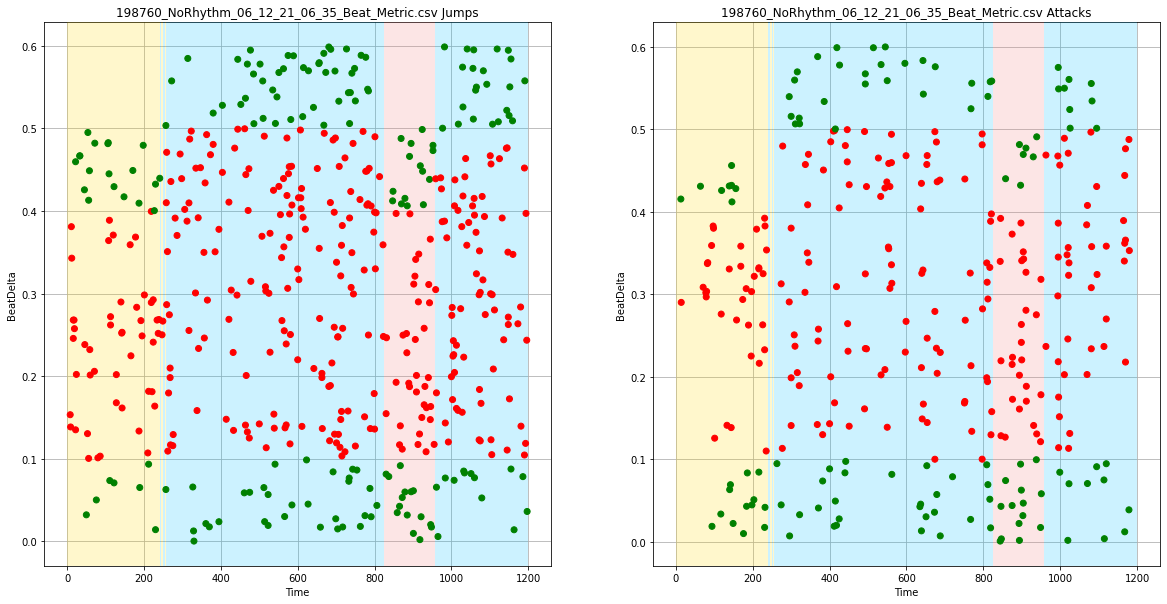

198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Various_Metric.csv 198760_RhythmControlled_06_12_21_07_06_Combat_Metric.csv
Jumps hits: 197/427 = 0.46 %
Attacks hits: 168/312 = 0.54 %


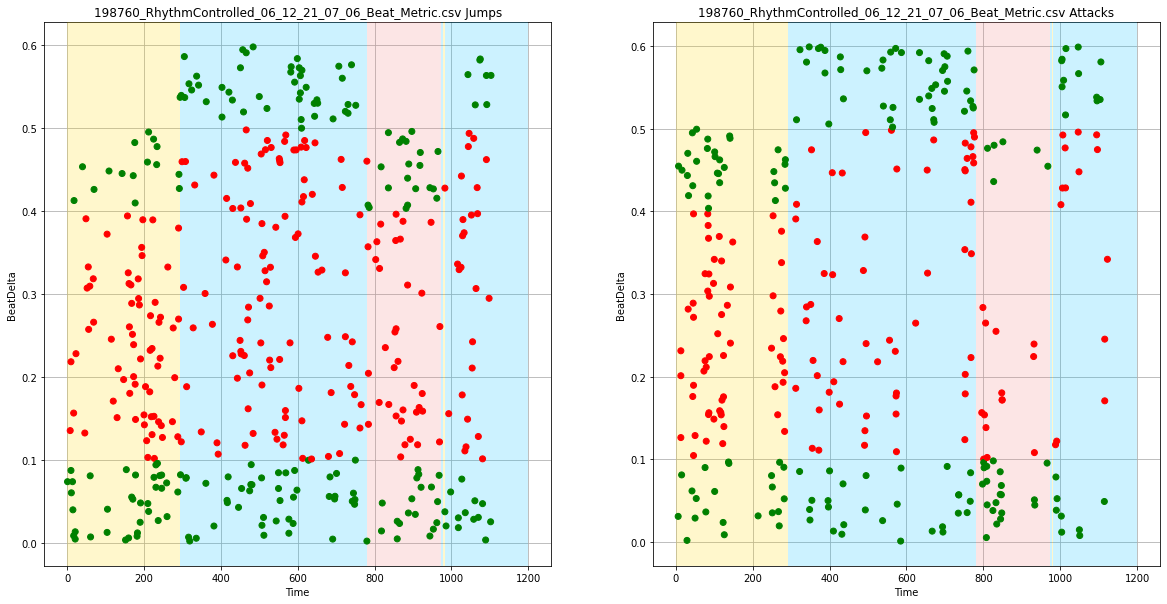

244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv 244206_NoRhythm_03_12_21_03_22_Various_Metric.csv 244206_NoRhythm_03_12_21_03_22_Combat_Metric.csv
Jumps hits: 236/585 = 0.4 %
Attacks hits: 85/210 = 0.4 %


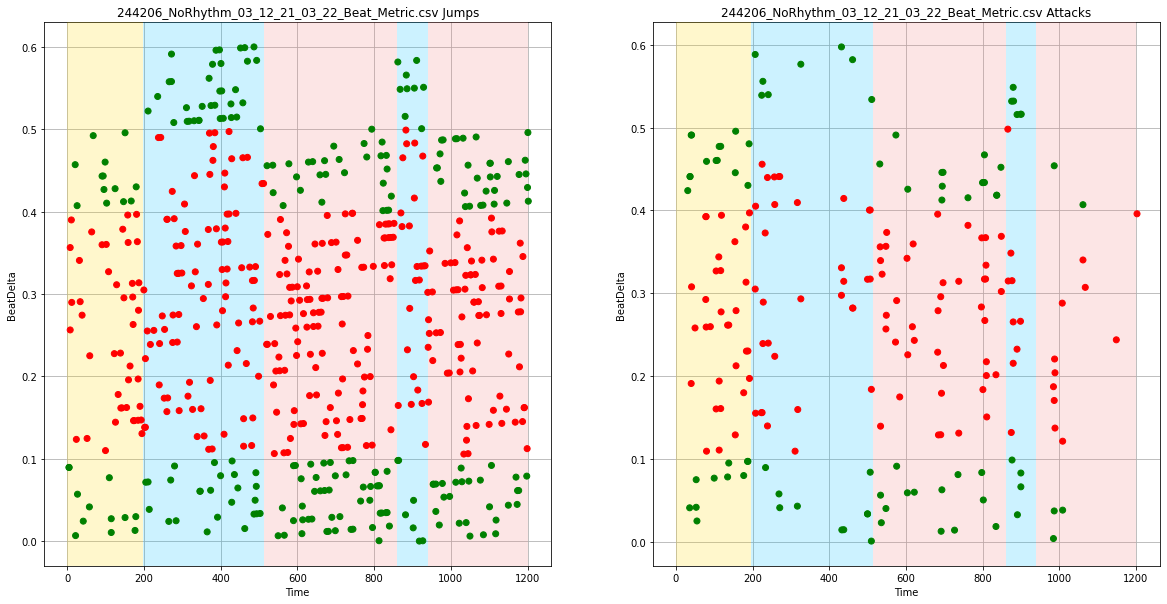

244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Various_Metric.csv 244206_RhythmControlled_03_12_21_03_50_Combat_Metric.csv
Jumps hits: 439/590 = 0.74 %
Attacks hits: 106/171 = 0.62 %


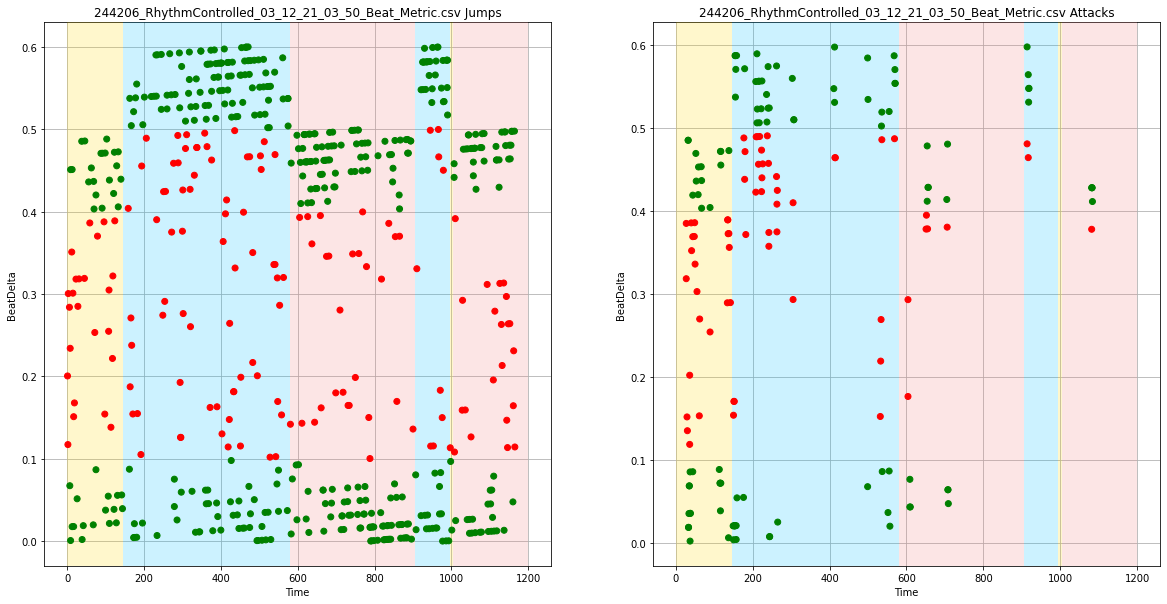

246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv 246229_NoRhythm_02_12_21_04_03_Various_Metric.csv 246229_NoRhythm_02_12_21_04_03_Combat_Metric.csv
Jumps hits: 193/482 = 0.4 %
Attacks hits: 102/239 = 0.43 %


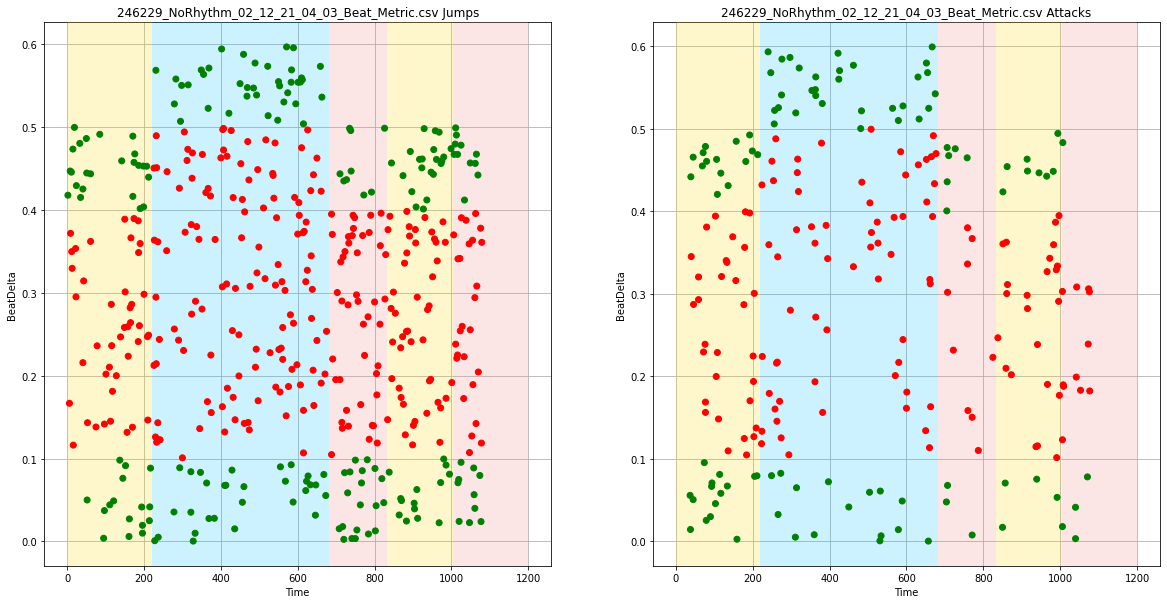

246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Various_Metric.csv 246229_RhythmControlled_02_12_21_04_30_Combat_Metric.csv
Jumps hits: 243/632 = 0.38 %
Attacks hits: 135/263 = 0.51 %


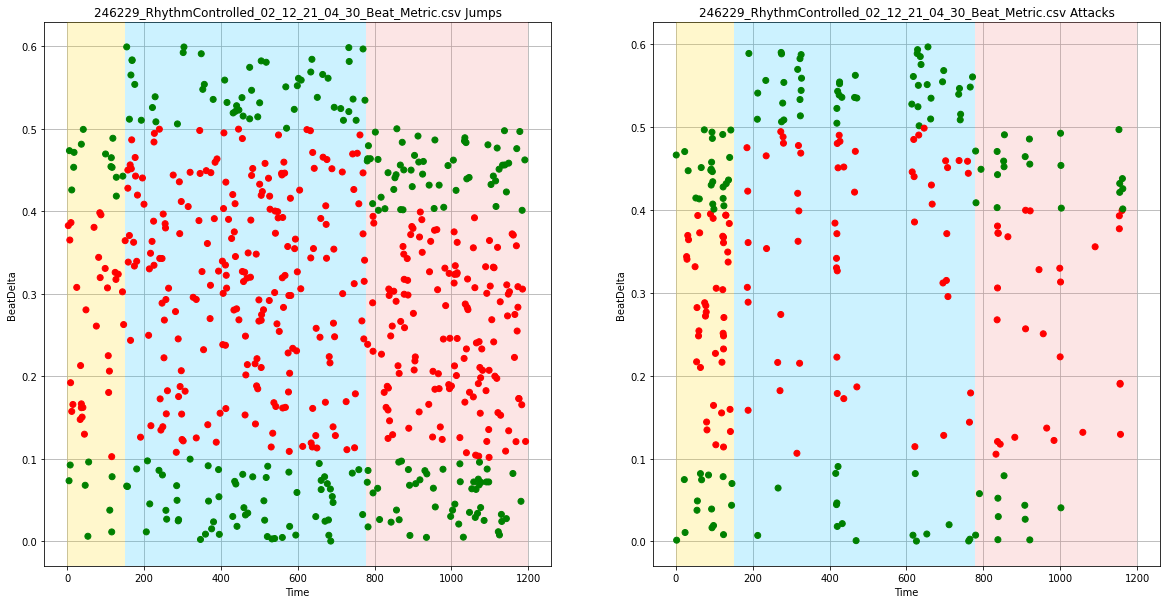

288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv 288786_NoRhythm_05_12_21_04_49_Various_Metric.csv 288786_NoRhythm_05_12_21_04_49_Combat_Metric.csv
Jumps hits: 246/682 = 0.36 %
Attacks hits: 35/103 = 0.34 %


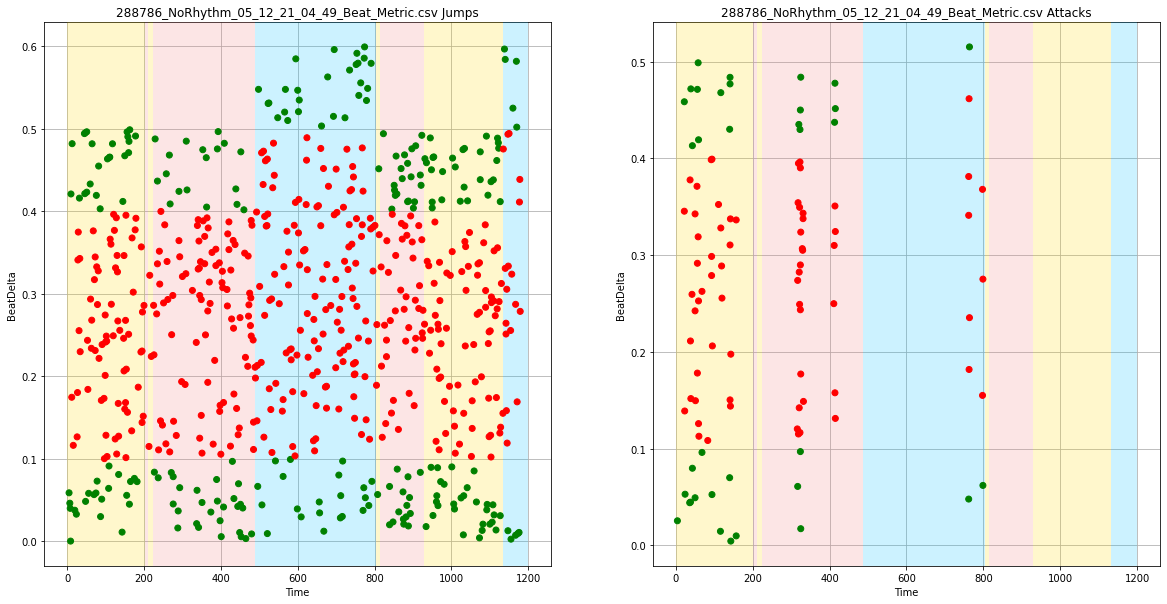

288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Various_Metric.csv 288786_RhythmControlled_05_12_21_04_21_Combat_Metric.csv
Jumps hits: 184/442 = 0.42 %
Attacks hits: 196/531 = 0.37 %


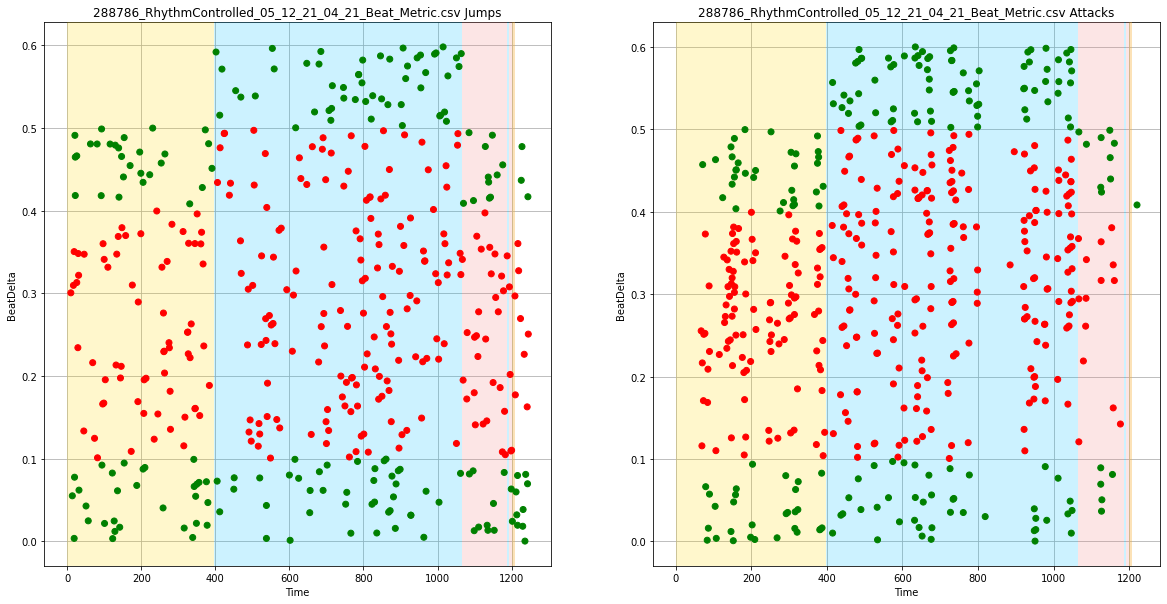

353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv 353252_NoRhythm_05_12_21_04_39_Various_Metric.csv 353252_NoRhythm_05_12_21_04_39_Combat_Metric.csv
Jumps hits: 325/825 = 0.39 %
Attacks hits: 36/91 = 0.4 %


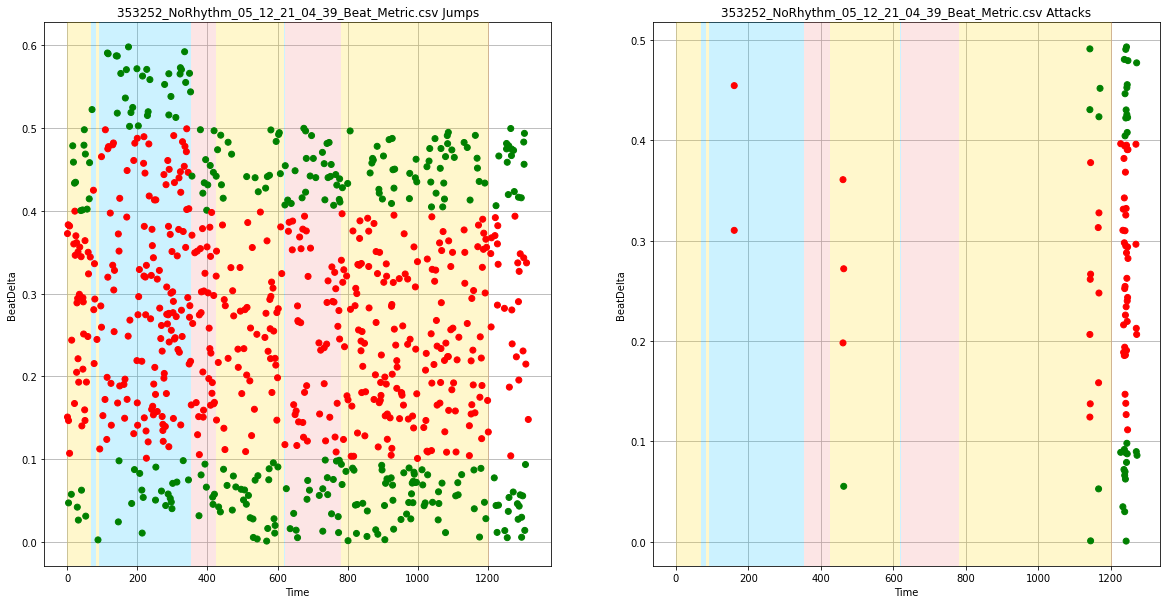

353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Various_Metric.csv 353252_RhythmControlled_05_12_21_04_13_Combat_Metric.csv
Jumps hits: 346/575 = 0.6 %
Attacks hits: 86/136 = 0.63 %


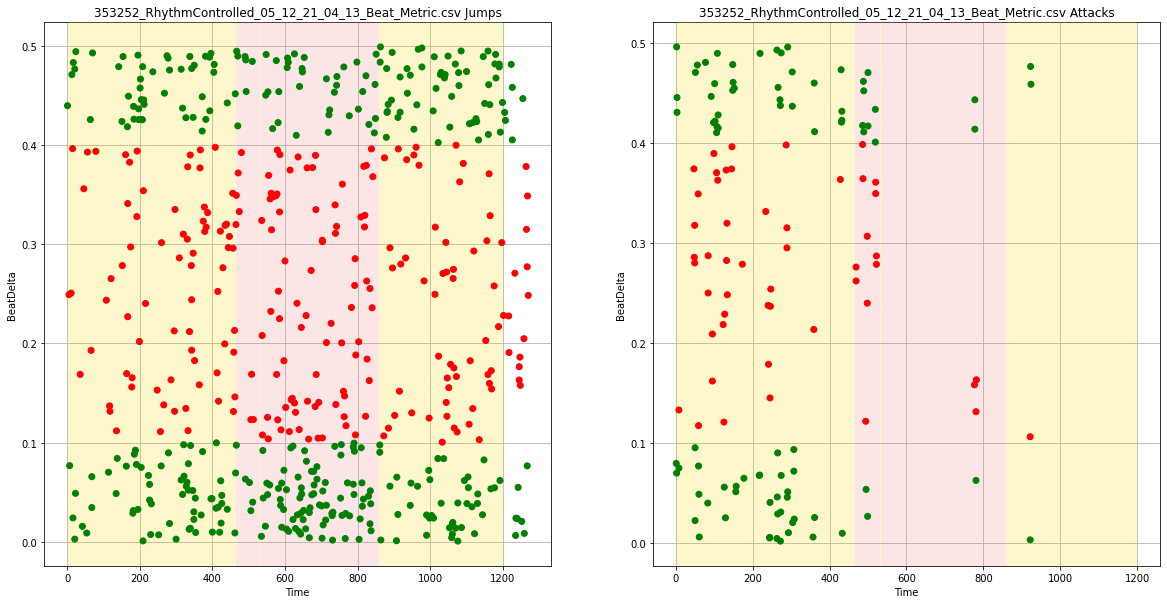

427217_NoRhythm_04_12_21_01_09_Beat_Metric.csv 427217_NoRhythm_04_12_21_01_09_Various_Metric.csv 427217_NoRhythm_04_12_21_01_09_Combat_Metric.csv
Jumps hits: 165/452 = 0.37 %
Attacks hits: 71/231 = 0.31 %


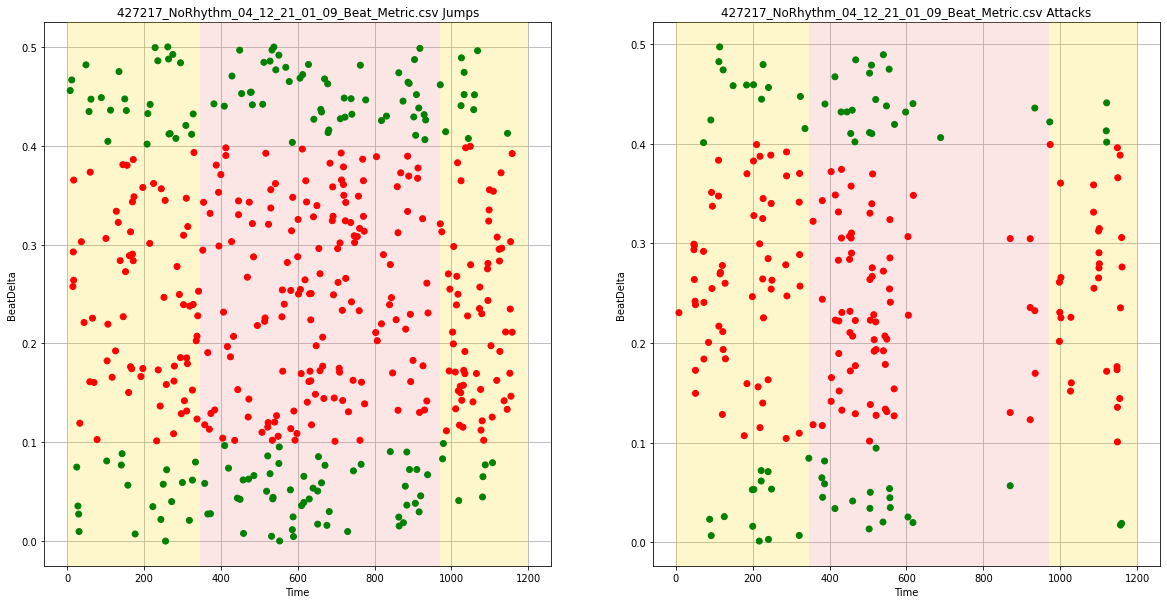

427217_RhythmControlled_04_12_21_02_02_Beat_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Various_Metric.csv 427217_RhythmControlled_04_12_21_02_02_Combat_Metric.csv
Jumps hits: 155/373 = 0.42 %
Attacks hits: 156/351 = 0.44 %


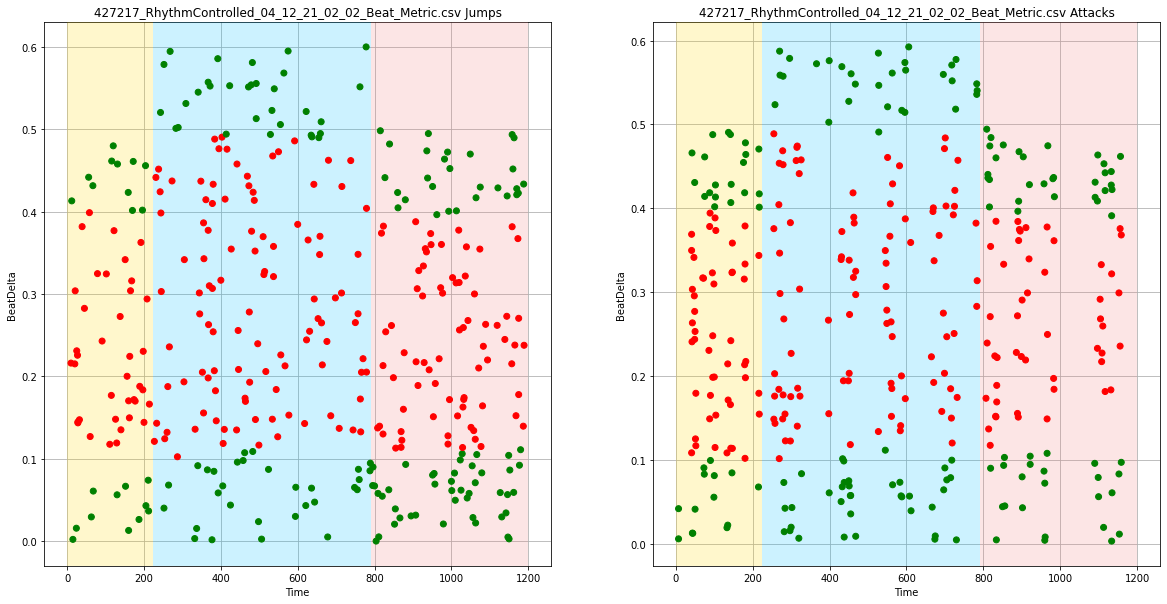

452042_NoRhythm_01_12_21_12_47_Beat_Metric.csv 452042_NoRhythm_01_12_21_12_47_Various_Metric.csv 452042_NoRhythm_01_12_21_12_47_Combat_Metric.csv
Jumps hits: 269/618 = 0.44 %
Attacks hits: 150/360 = 0.42 %


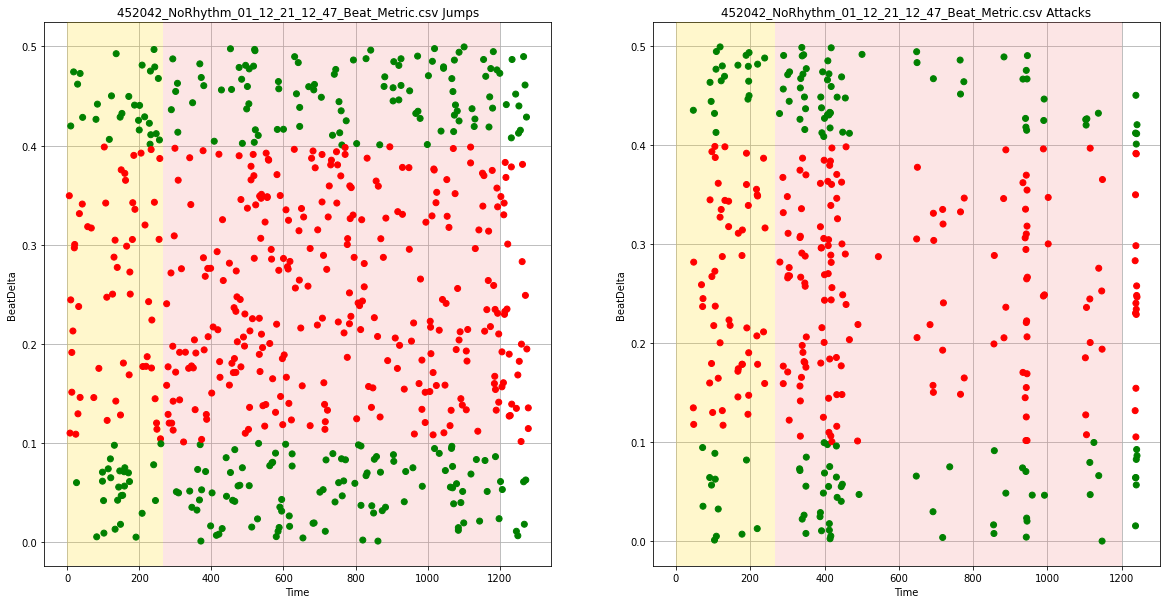

452042_RhythmControlled_01_12_21_01_19_Beat_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Various_Metric.csv 452042_RhythmControlled_01_12_21_01_19_Combat_Metric.csv
Jumps hits: 310/526 = 0.59 %
Attacks hits: 108/232 = 0.47 %


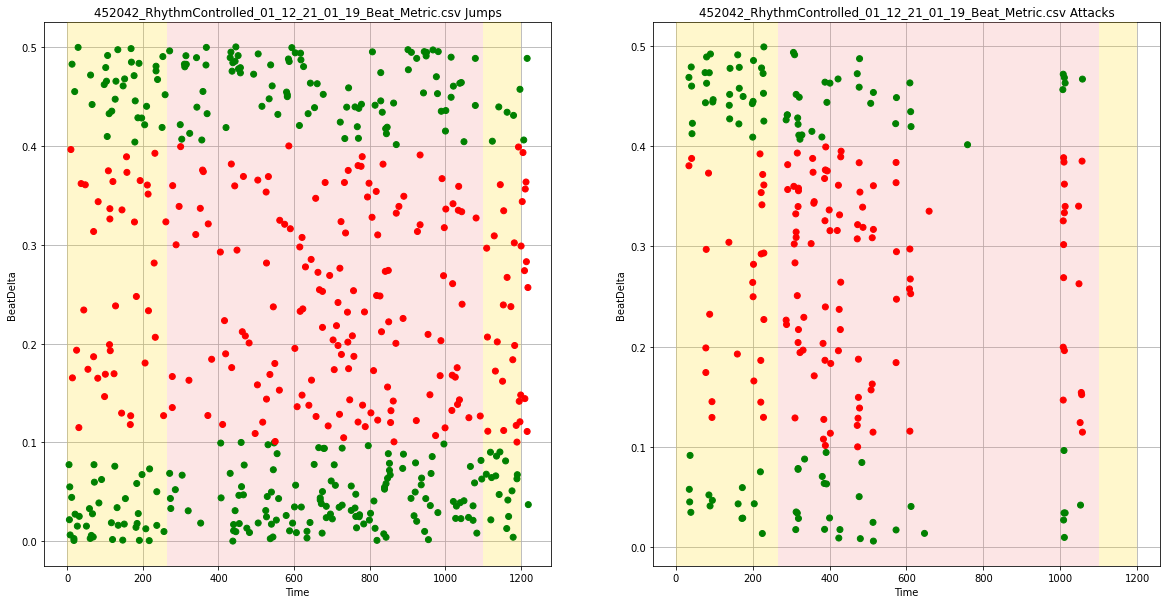

481091_NoRhythm_04_12_21_07_41_Beat_Metric.csv 481091_NoRhythm_04_12_21_07_41_Various_Metric.csv 481091_NoRhythm_04_12_21_07_41_Combat_Metric.csv
Jumps hits: 194/497 = 0.39 %
Attacks hits: 81/222 = 0.36 %


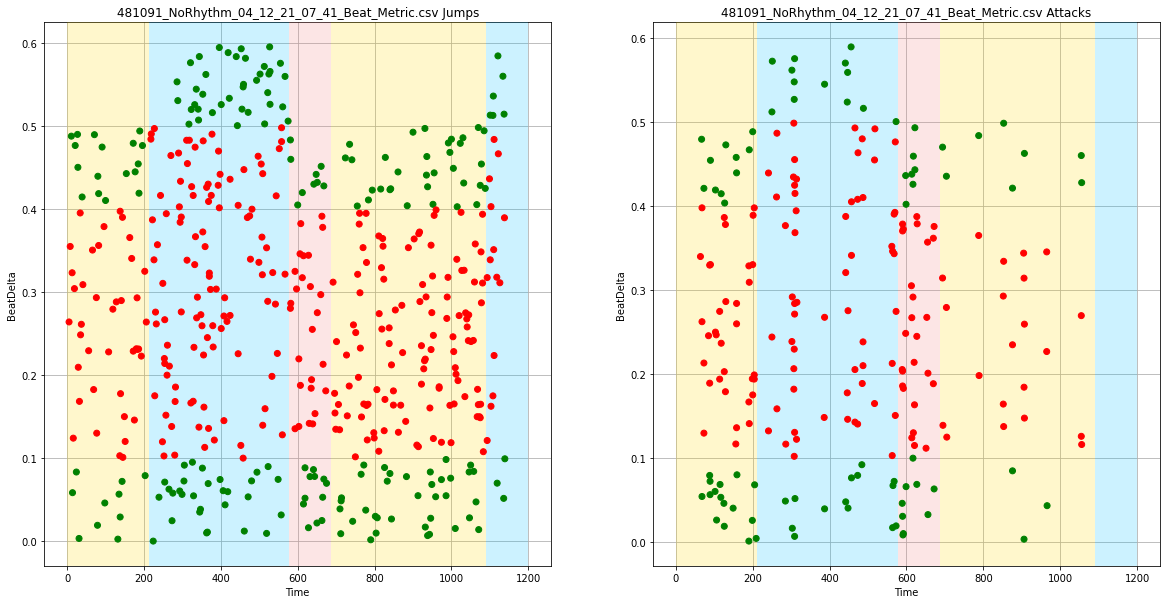

481091_RhythmControlled_04_12_21_08_10_Beat_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Various_Metric.csv 481091_RhythmControlled_04_12_21_08_10_Combat_Metric.csv
Jumps hits: 395/560 = 0.71 %
Attacks hits: 110/167 = 0.66 %


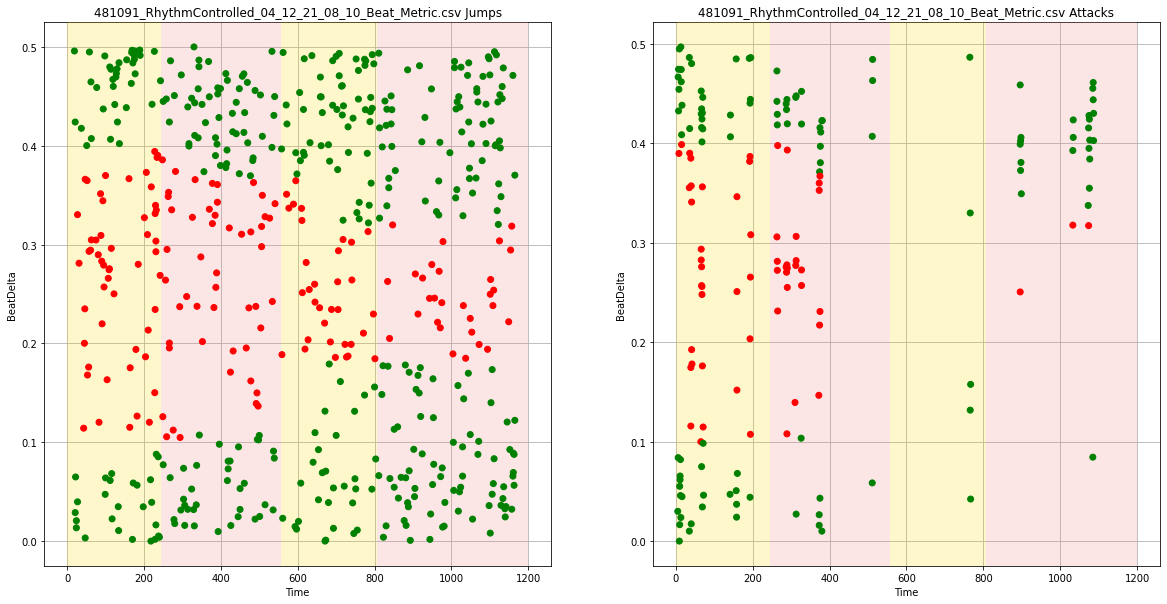

527704_NoRhythm_30_11_21_10_40_Beat_Metric.csv 527704_NoRhythm_30_11_21_10_40_Various_Metric.csv 527704_NoRhythm_30_11_21_10_40_Combat_Metric.csv
Jumps hits: 251/624 = 0.4 %
Attacks hits: 28/86 = 0.33 %


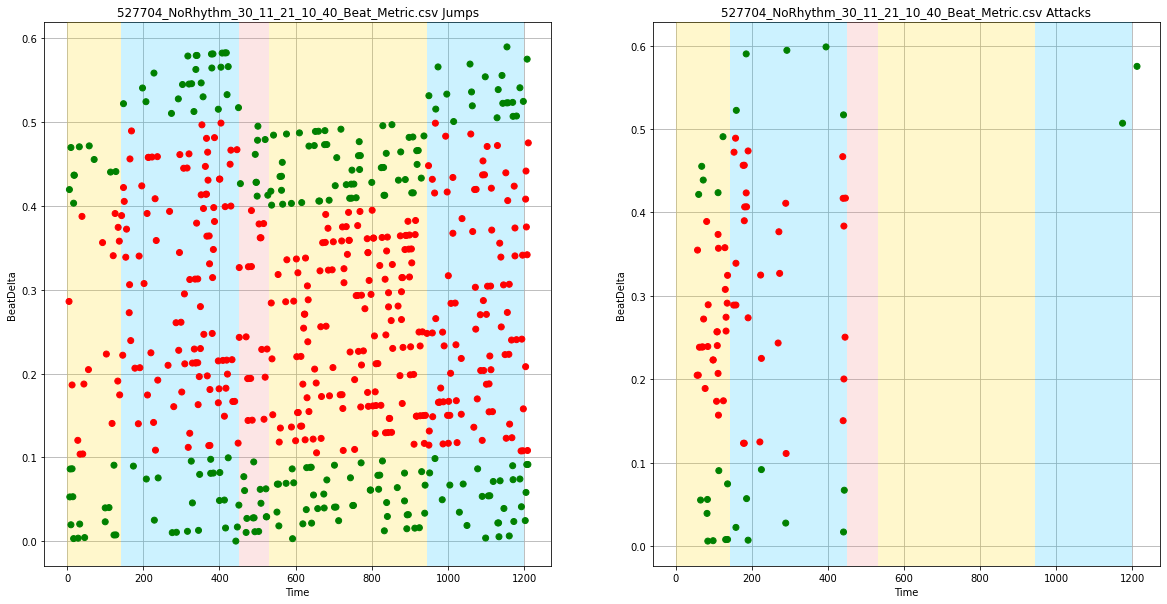

527704_RhythmControlled_30_11_21_10_11_Beat_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Various_Metric.csv 527704_RhythmControlled_30_11_21_10_11_Combat_Metric.csv
Jumps hits: 239/467 = 0.51 %
Attacks hits: 77/180 = 0.43 %


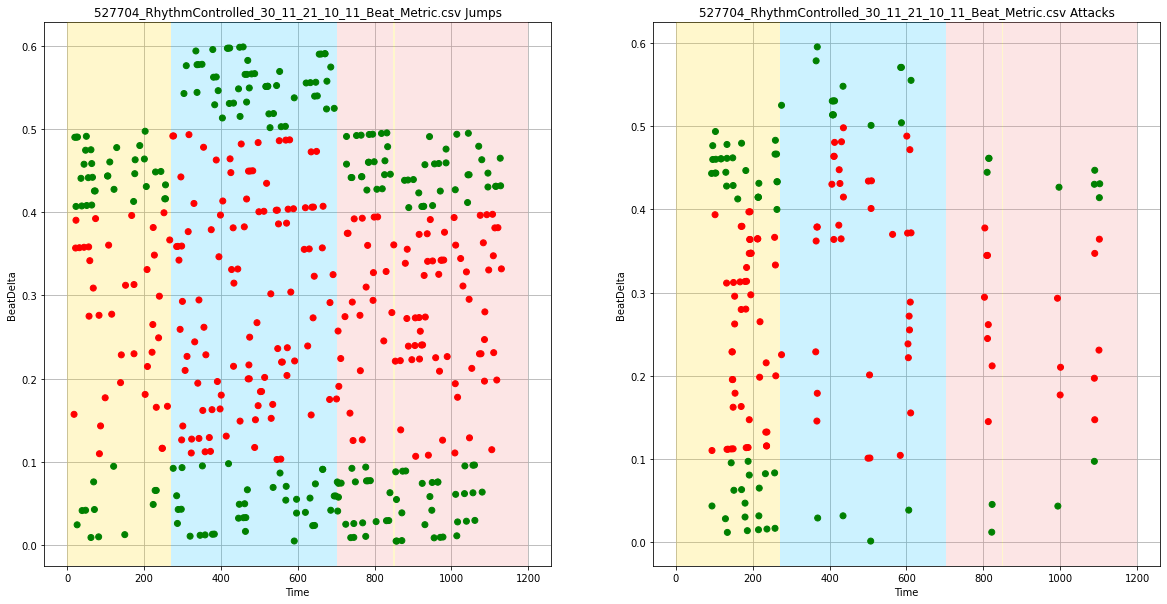

621162_NoRhythm_04_12_21_11_56_Beat_Metric.csv 621162_NoRhythm_04_12_21_11_56_Various_Metric.csv 621162_NoRhythm_04_12_21_11_56_Combat_Metric.csv
Jumps hits: 135/376 = 0.36 %
Attacks hits: 108/289 = 0.37 %


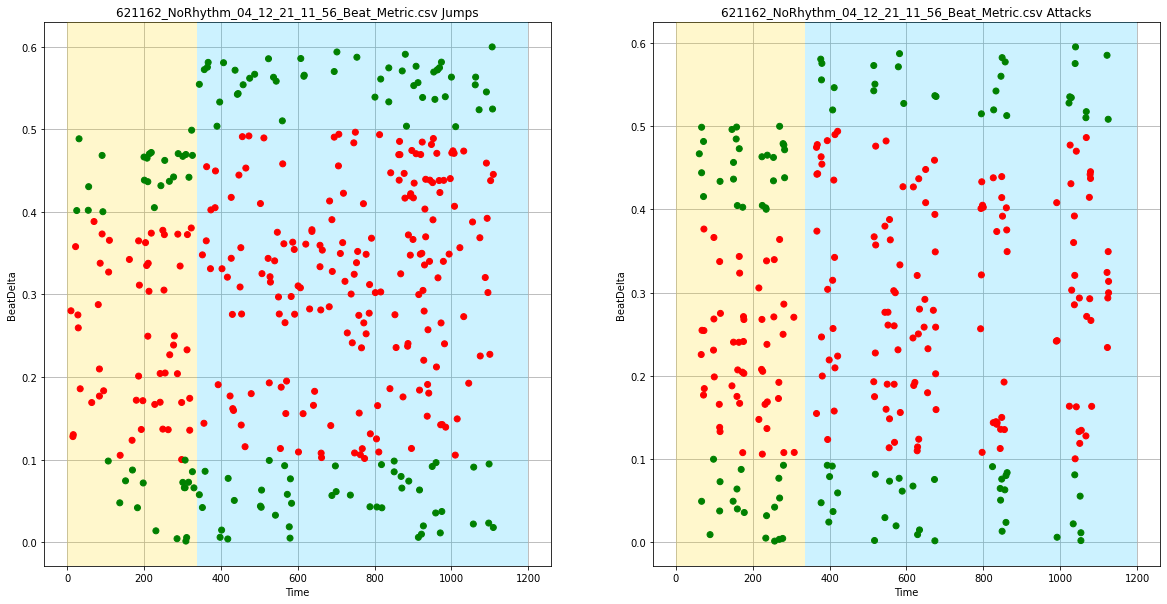

621162_RhythmControlled_04_12_21_12_35_Beat_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Various_Metric.csv 621162_RhythmControlled_04_12_21_12_35_Combat_Metric.csv
Jumps hits: 269/451 = 0.6 %
Attacks hits: 64/107 = 0.6 %


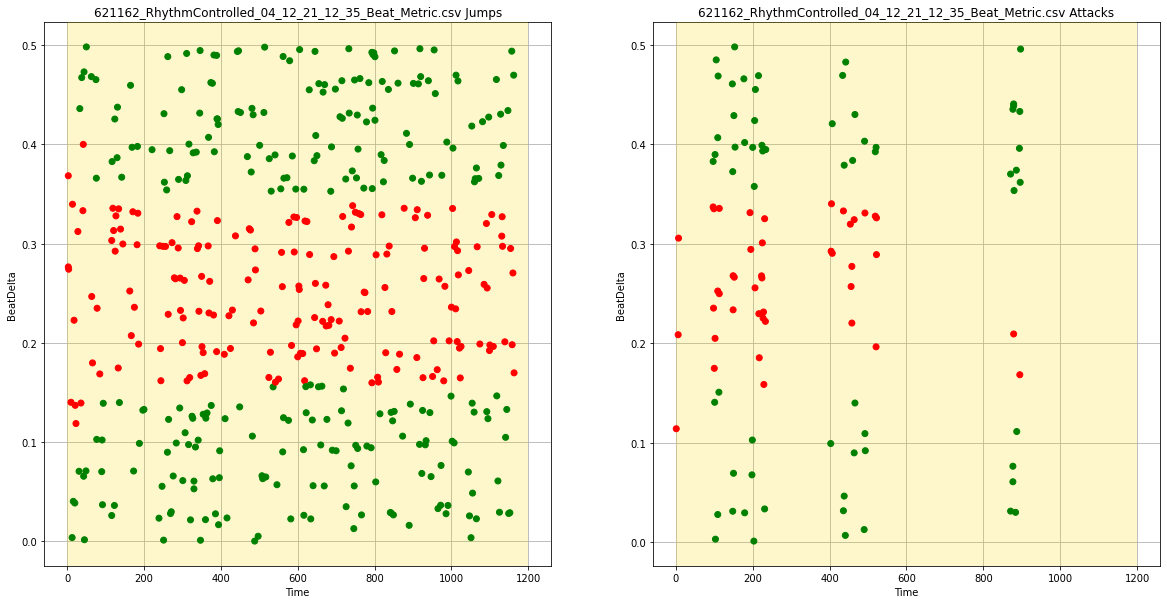

624794_NoRhythm_30_11_21_01_06_Beat_Metric.csv 624794_NoRhythm_30_11_21_01_06_Various_Metric.csv 624794_NoRhythm_30_11_21_01_06_Combat_Metric.csv
Jumps hits: 178/472 = 0.38 %
Attacks hits: 27/62 = 0.44 %


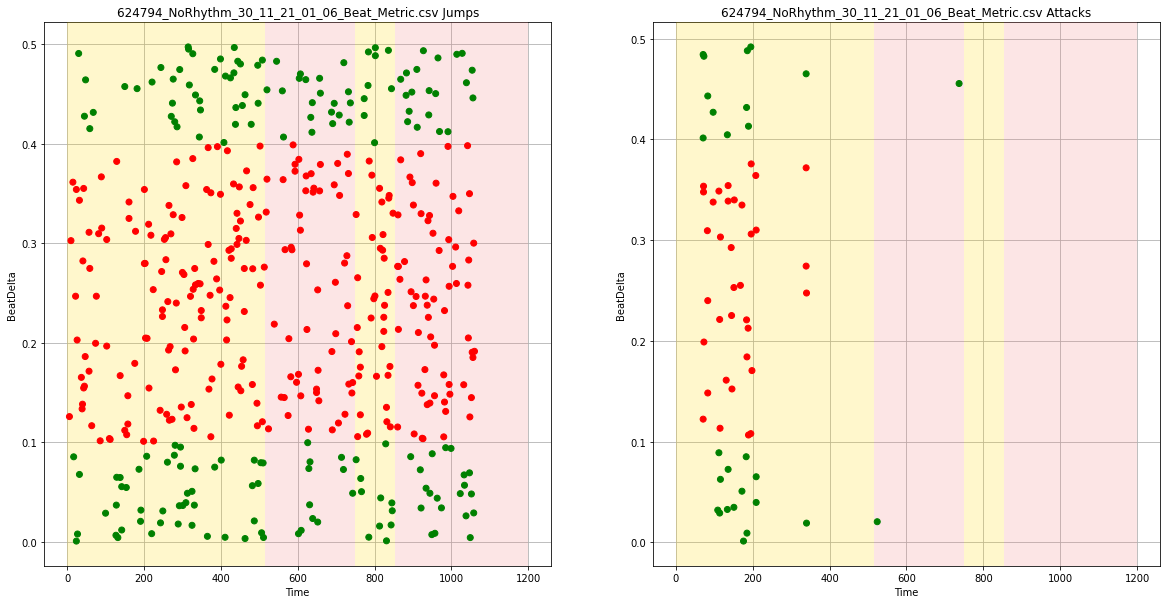

624794_RhythmControlled_30_11_21_01_33_Beat_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Various_Metric.csv 624794_RhythmControlled_30_11_21_01_33_Combat_Metric.csv
Jumps hits: 227/627 = 0.36 %
Attacks hits: 105/235 = 0.45 %


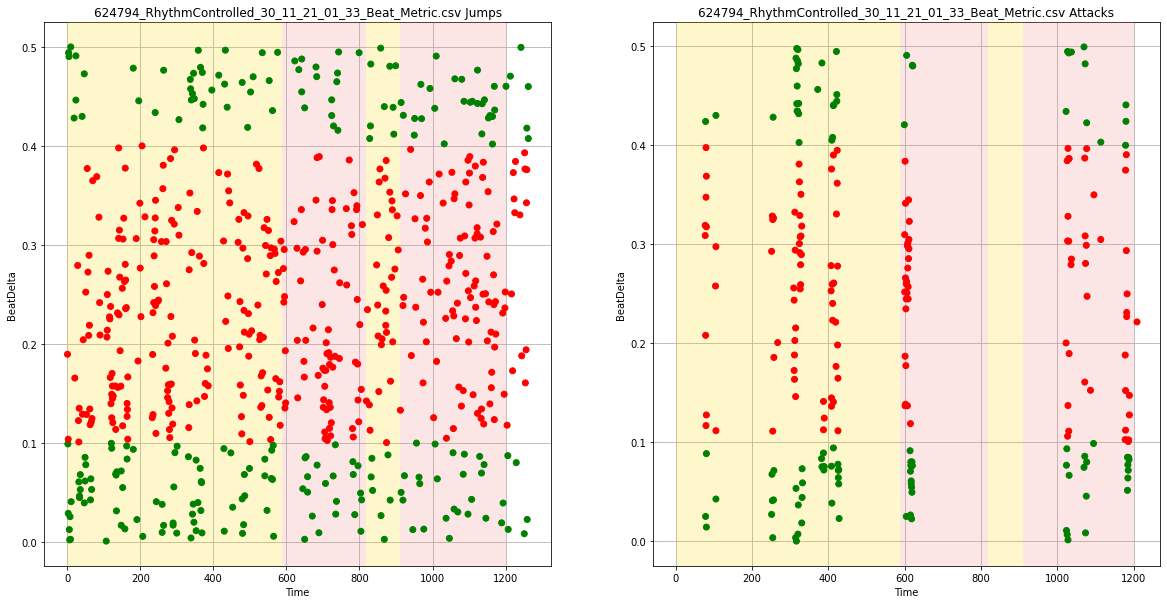

758980_NoRhythm_02_12_21_04_30_Beat_Metric.csv 758980_NoRhythm_02_12_21_04_30_Various_Metric.csv 758980_NoRhythm_02_12_21_04_30_Combat_Metric.csv
Jumps hits: 298/680 = 0.44 %
Attacks hits: 117/313 = 0.37 %


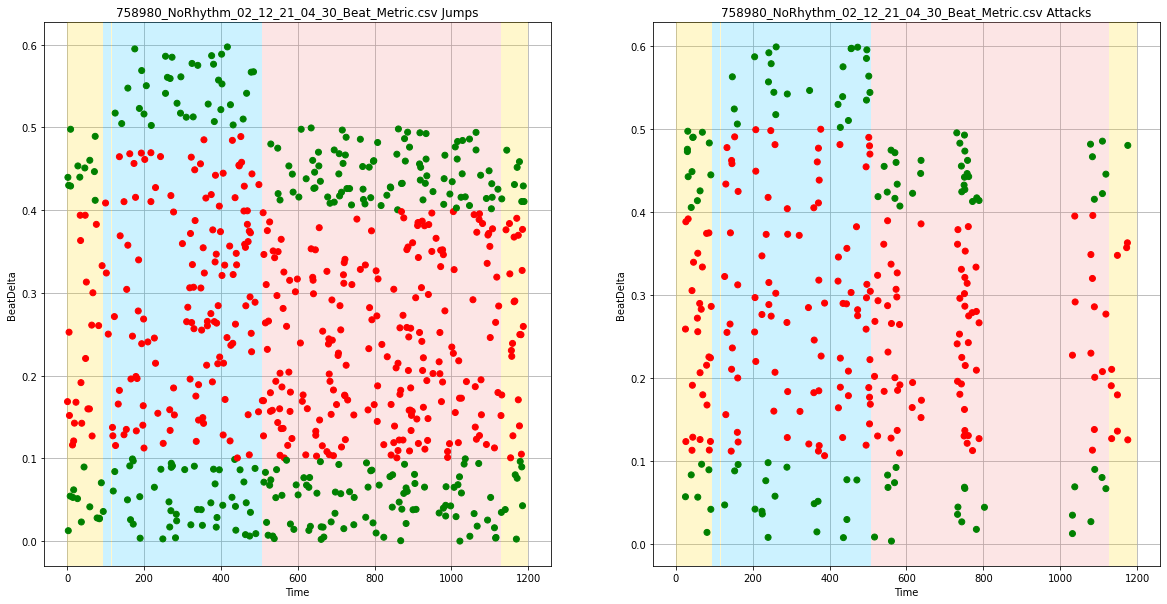

758980_RhythmControlled_02_12_21_04_01_Beat_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Various_Metric.csv 758980_RhythmControlled_02_12_21_04_01_Combat_Metric.csv
Jumps hits: 299/542 = 0.55 %
Attacks hits: 132/259 = 0.51 %


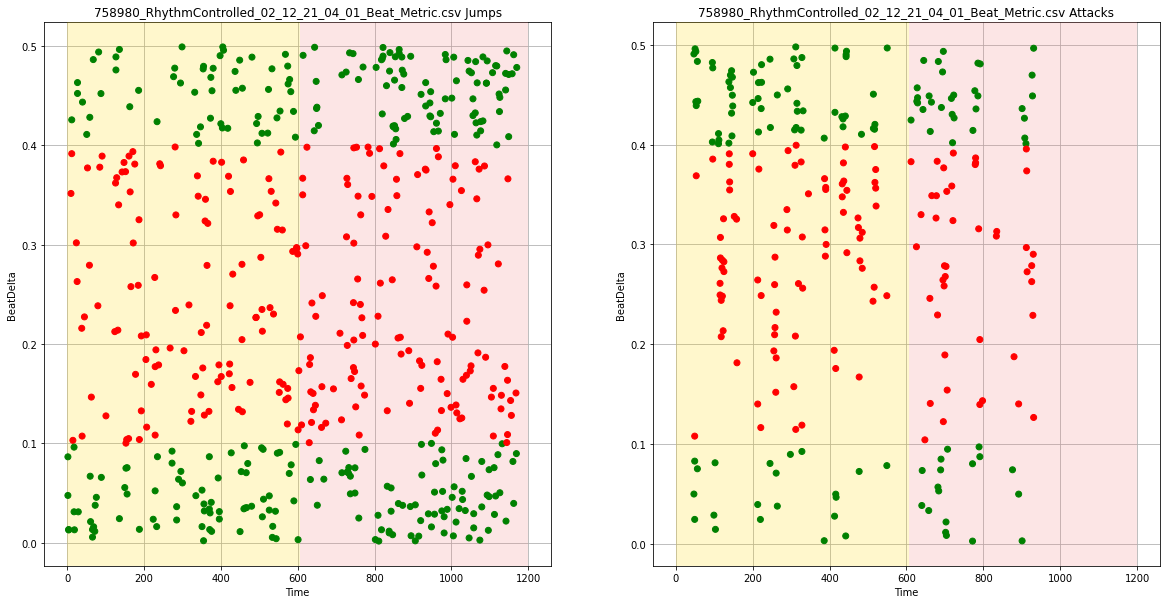

817336_NoRhythm_03_12_21_03_52_Beat_Metric.csv 817336_NoRhythm_03_12_21_03_52_Various_Metric.csv 817336_NoRhythm_03_12_21_03_52_Combat_Metric.csv
Jumps hits: 230/580 = 0.4 %
Attacks hits: 116/309 = 0.38 %


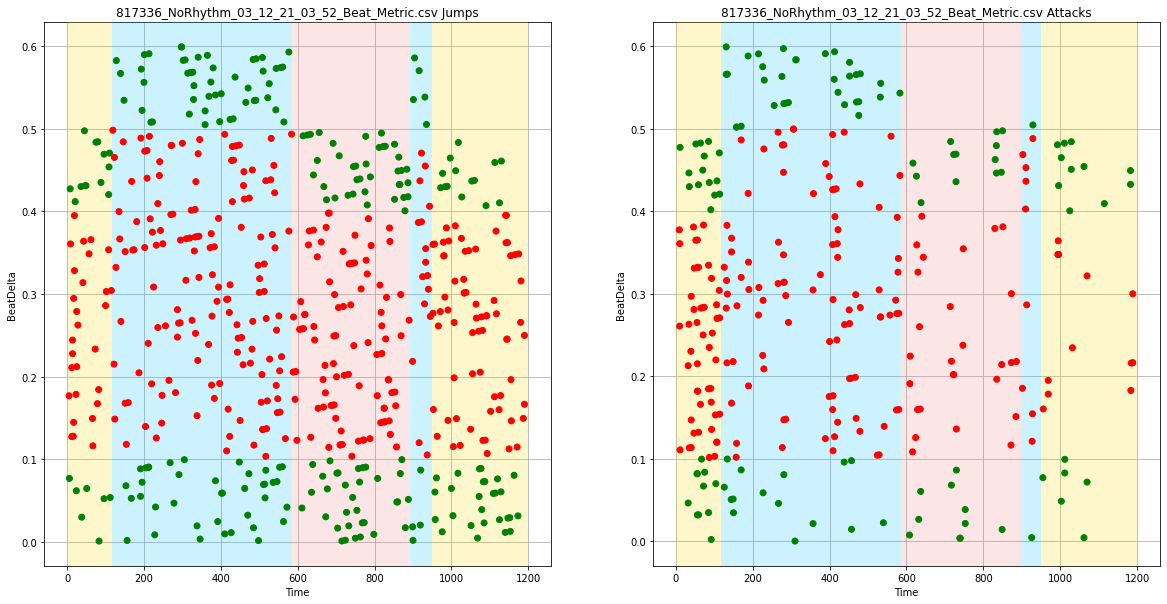

817336_RhythmControlled_03_12_21_03_25_Beat_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Various_Metric.csv 817336_RhythmControlled_03_12_21_03_25_Combat_Metric.csv
Jumps hits: 307/486 = 0.63 %
Attacks hits: 111/187 = 0.59 %


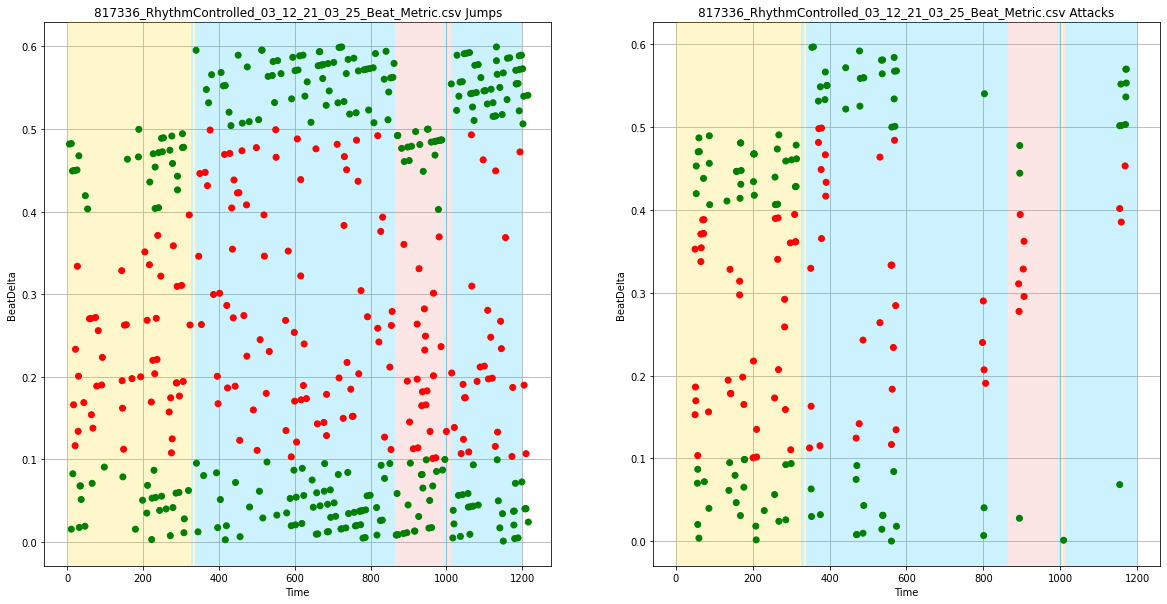

854472_NoRhythm_30_11_21_08_13_Beat_Metric.csv 854472_NoRhythm_30_11_21_08_13_Various_Metric.csv 854472_NoRhythm_30_11_21_08_13_Combat_Metric.csv
Jumps hits: 190/554 = 0.34 %
Attacks hits: 22/60 = 0.37 %


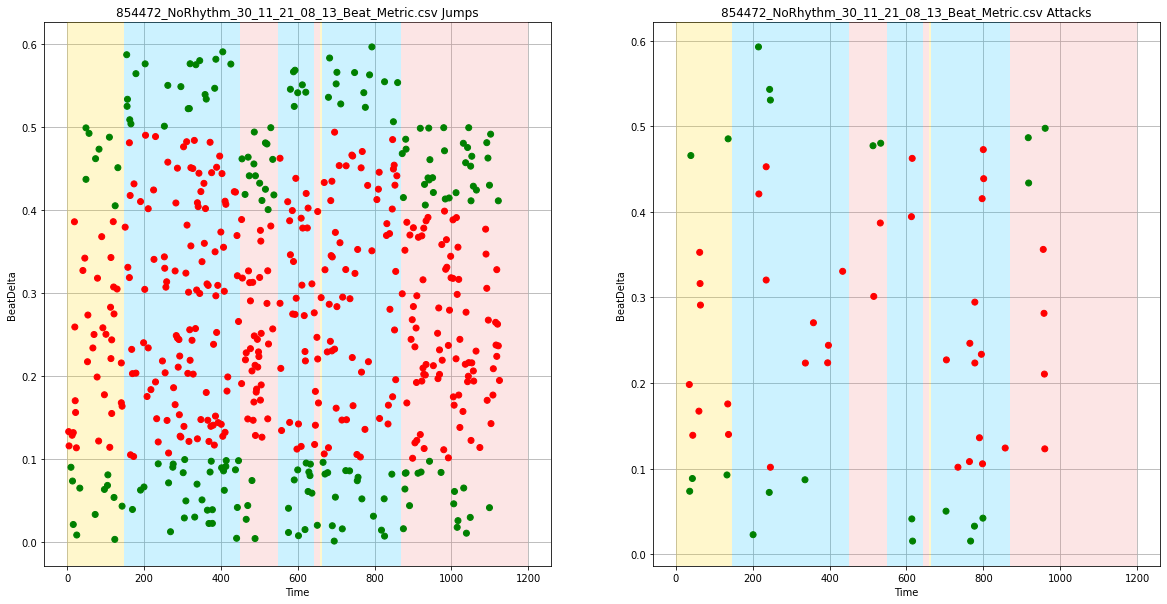

854472_RhythmControlled_30_11_21_07_45_Beat_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Various_Metric.csv 854472_RhythmControlled_30_11_21_07_45_Combat_Metric.csv
Jumps hits: 170/325 = 0.52 %
Attacks hits: 16/40 = 0.4 %


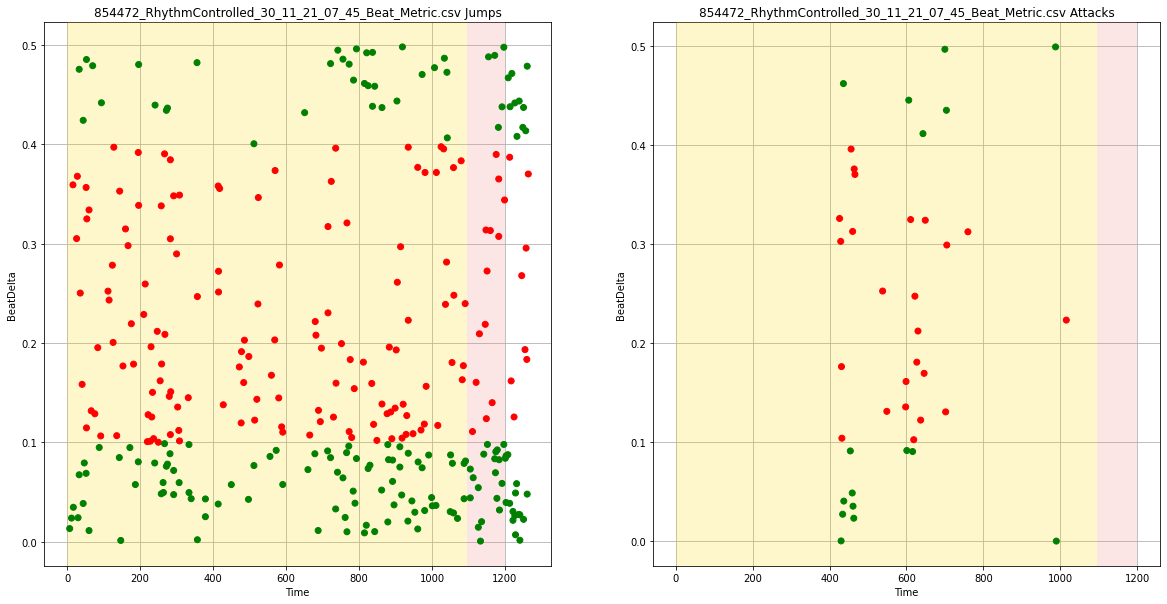

862197_NoRhythm_02_12_21_06_32_Beat_Metric.csv 862197_NoRhythm_02_12_21_06_32_Various_Metric.csv 862197_NoRhythm_02_12_21_06_32_Combat_Metric.csv
Jumps hits: 259/696 = 0.37 %
Attacks hits: 9/29 = 0.31 %


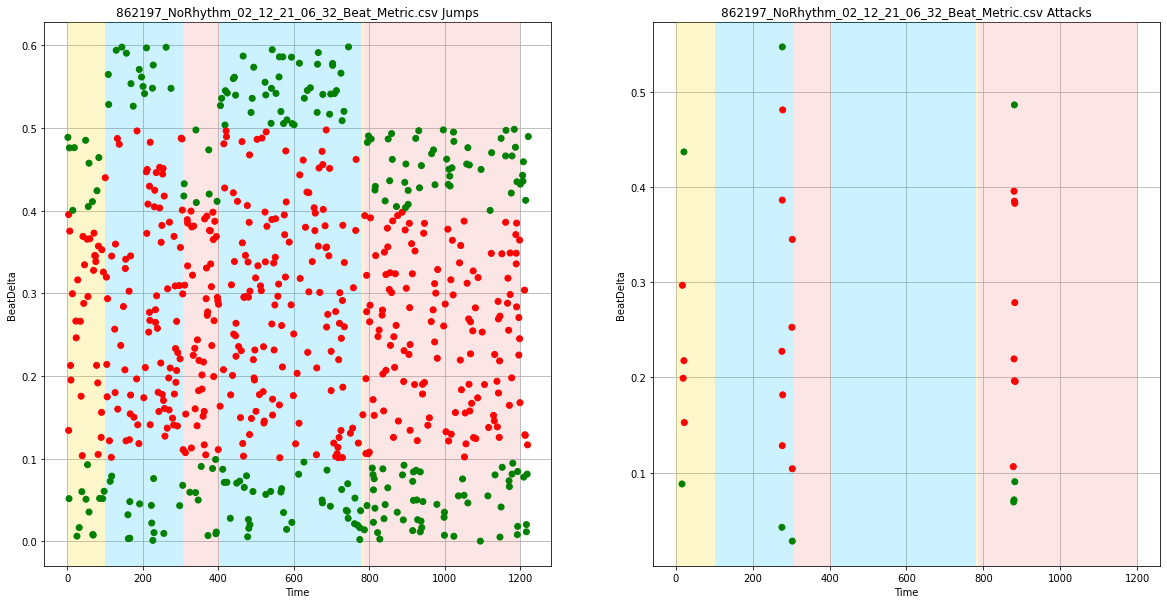

862197_RhythmControlled_02_12_21_06_04_Beat_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Various_Metric.csv 862197_RhythmControlled_02_12_21_06_04_Combat_Metric.csv
Jumps hits: 228/528 = 0.43 %
Attacks hits: 76/187 = 0.41 %


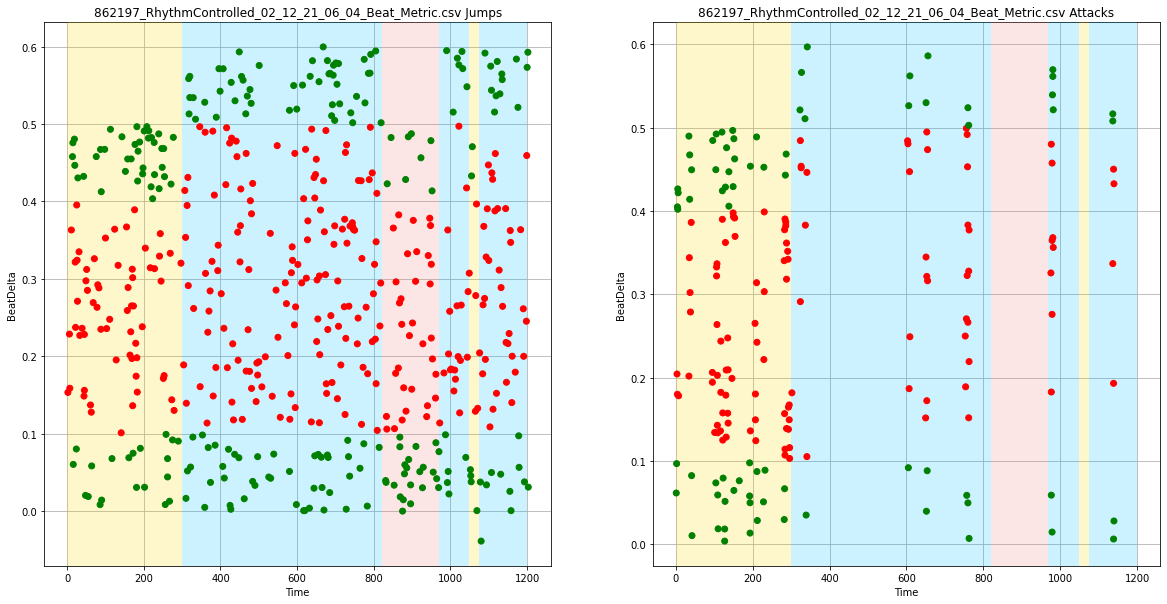

865172_NoRhythm_02_12_21_04_30_Beat_Metric.csv 865172_NoRhythm_02_12_21_04_30_Various_Metric.csv 865172_NoRhythm_02_12_21_04_30_Combat_Metric.csv
Jumps hits: 333/769 = 0.43 %
Attacks hits: 27/68 = 0.4 %


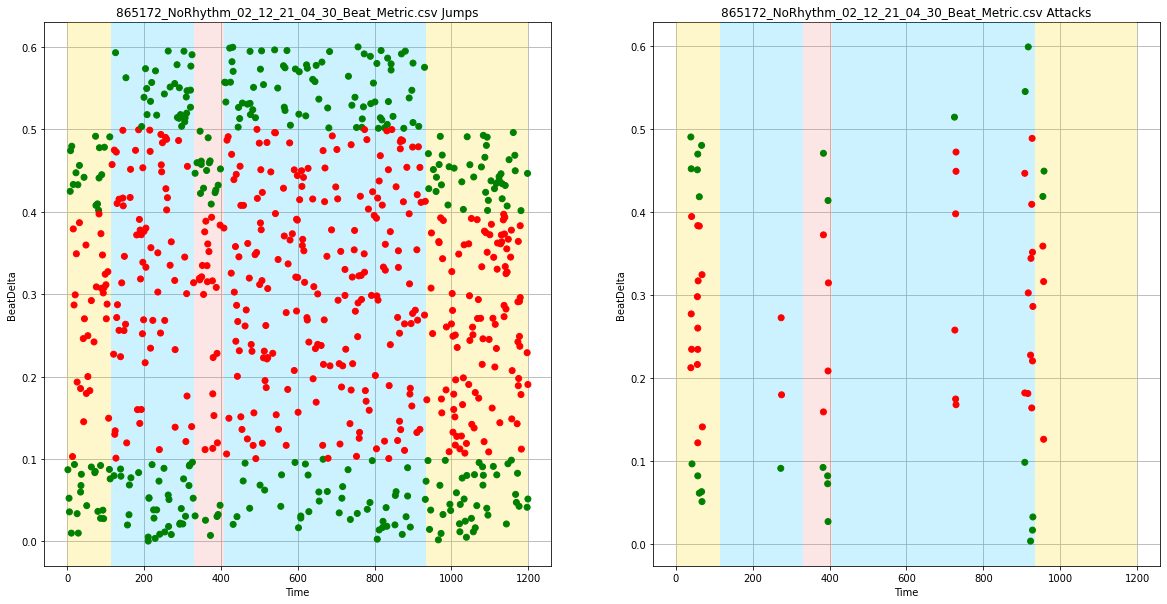

865172_RhythmControlled_02_12_21_03_59_Beat_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Various_Metric.csv 865172_RhythmControlled_02_12_21_03_59_Combat_Metric.csv
Jumps hits: 311/441 = 0.71 %
Attacks hits: 112/147 = 0.76 %


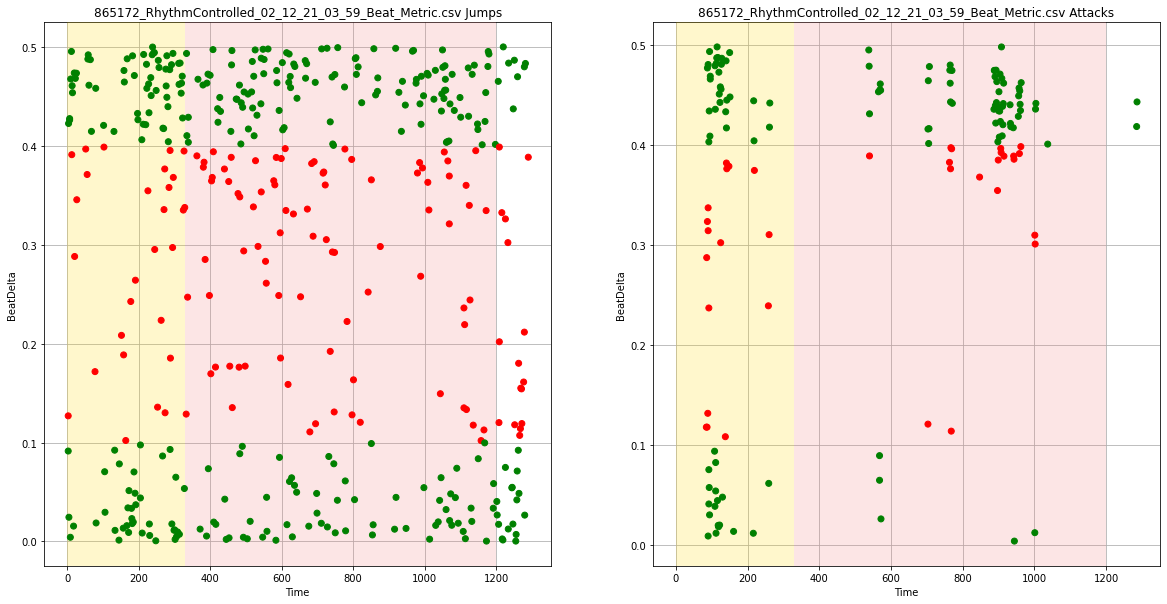

865850_NoRhythm_04_12_21_08_07_Beat_Metric.csv 865850_NoRhythm_04_12_21_08_07_Various_Metric.csv 865850_NoRhythm_04_12_21_08_07_Combat_Metric.csv
Jumps hits: 277/605 = 0.46 %
Attacks hits: 90/183 = 0.49 %


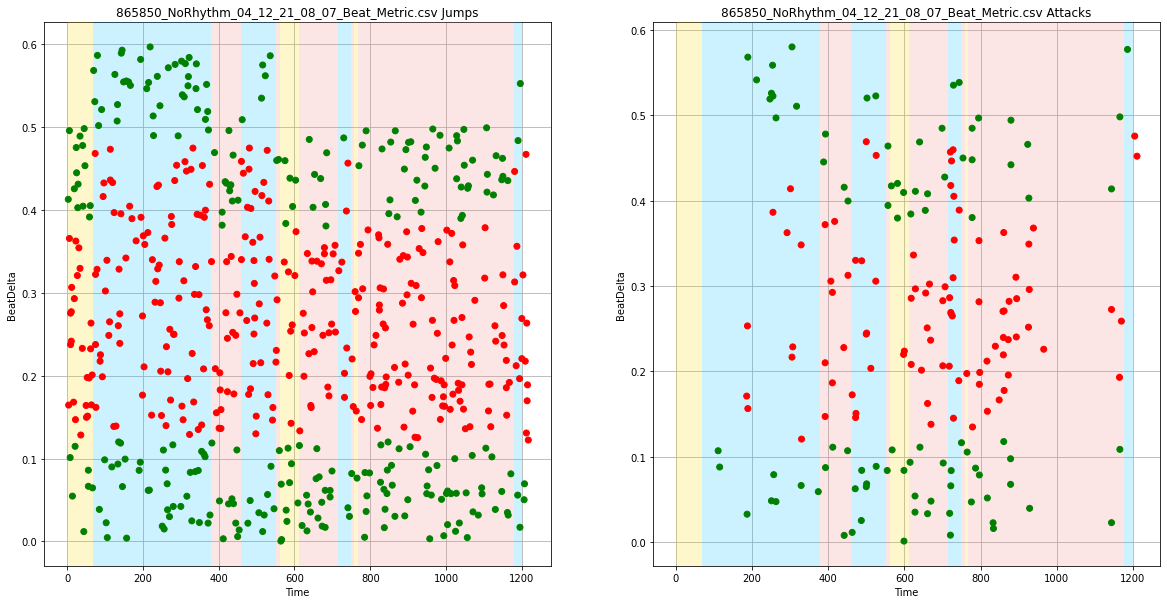

In [22]:

for beat, various, combat in zip(beat_metrics,various_metrics,combat_metrics):
    Analyse(beat, various, combat)

Notes:

In RythmControlled less fighting because its more frustrating?

Only compare first game versions played. In second playthrough people know more and it might change results